<a href="https://colab.research.google.com/github/LukaJurisic/Kaggle-Data-Challenge---Marketing_Campaign/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/Customer Personal Kaggle Dataset/marketing_campaign.csv', sep='\t')

# Display basic metadata
print("Shape of the dataset:", df.shape)
print("\nColumn names and data types:")
print(df.info())

# Identify columns with missing values
print("\nColumns with missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Shape of the dataset: (2240, 29)

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240

In [ ]:
# Handle missing values in the 'Income' column by filling with the mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Convert 'Dt_Customer' to datetime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Display information after cleaning
print("Information after data cleaning:")
print(df.info())

# Check for remaining missing values
print("\nRemaining missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Information after data cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  

Summary Statistics for Numeric Features:


Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25037.797168     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35538.750000     0.000000     0.000000    24.000000   
50%    1970.000000   51741.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68289.750000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  Marital_Status_Divorced  Marital_Status_Married  \
count       2240.000000  ...              2240.000000             2240.000000   
mean          27.062946  ...                 0.103571                0.385714   
std           41.280498  ...                 0.304772                0.486872   
min            0.000000  ...                 0.000000                0.000000   
25%            1.000000  ...                 0.000000                0.000000   
50%            8.000000  ...                 0.000000                0.000000   
75%           33.000000  ...                 0.000000                1.000000   
max          263.000000  ...                 1.000000                1.000000   

       Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
count            2240.000000              2240.000000           2240.000000   
mean                0.214286                 0.258929              0.034375   
std                 0.410418                 0.438144              0.182231   
min                 0.000000                 0.000000              0.000000   
25%                 0.000000                 0.000000              0.000000   
50%                 0.000000                 0.000000              0.000000   
75%                 0.000000                 1.000000              0.000000   
max                 1.000000                 1.000000              1.000000   

       Marital_Status_YOLO   Cluster_k3   Cluster_k4          Age        Spent  
count          2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  
mean              0.000893     1.044643     1.608036    27.194196   605.798214  
std               0.029874     0.722736     1.074254    11.984069   602.249288  
min               0.000000     0.000000     0.000000     0.000000     5.000000  
25%               0.000000     1.000000     0.000000    19.000000    68.750000  
50%               0.000000     1.000000     2.000000    26.000000   396.000000  
75%               0.000000     2.000000     2.000000    37.000000  1045.500000  
max               1.000000     2.000000     3.000000   103.000000  2525.000000  

[8 rows x 42 columns]

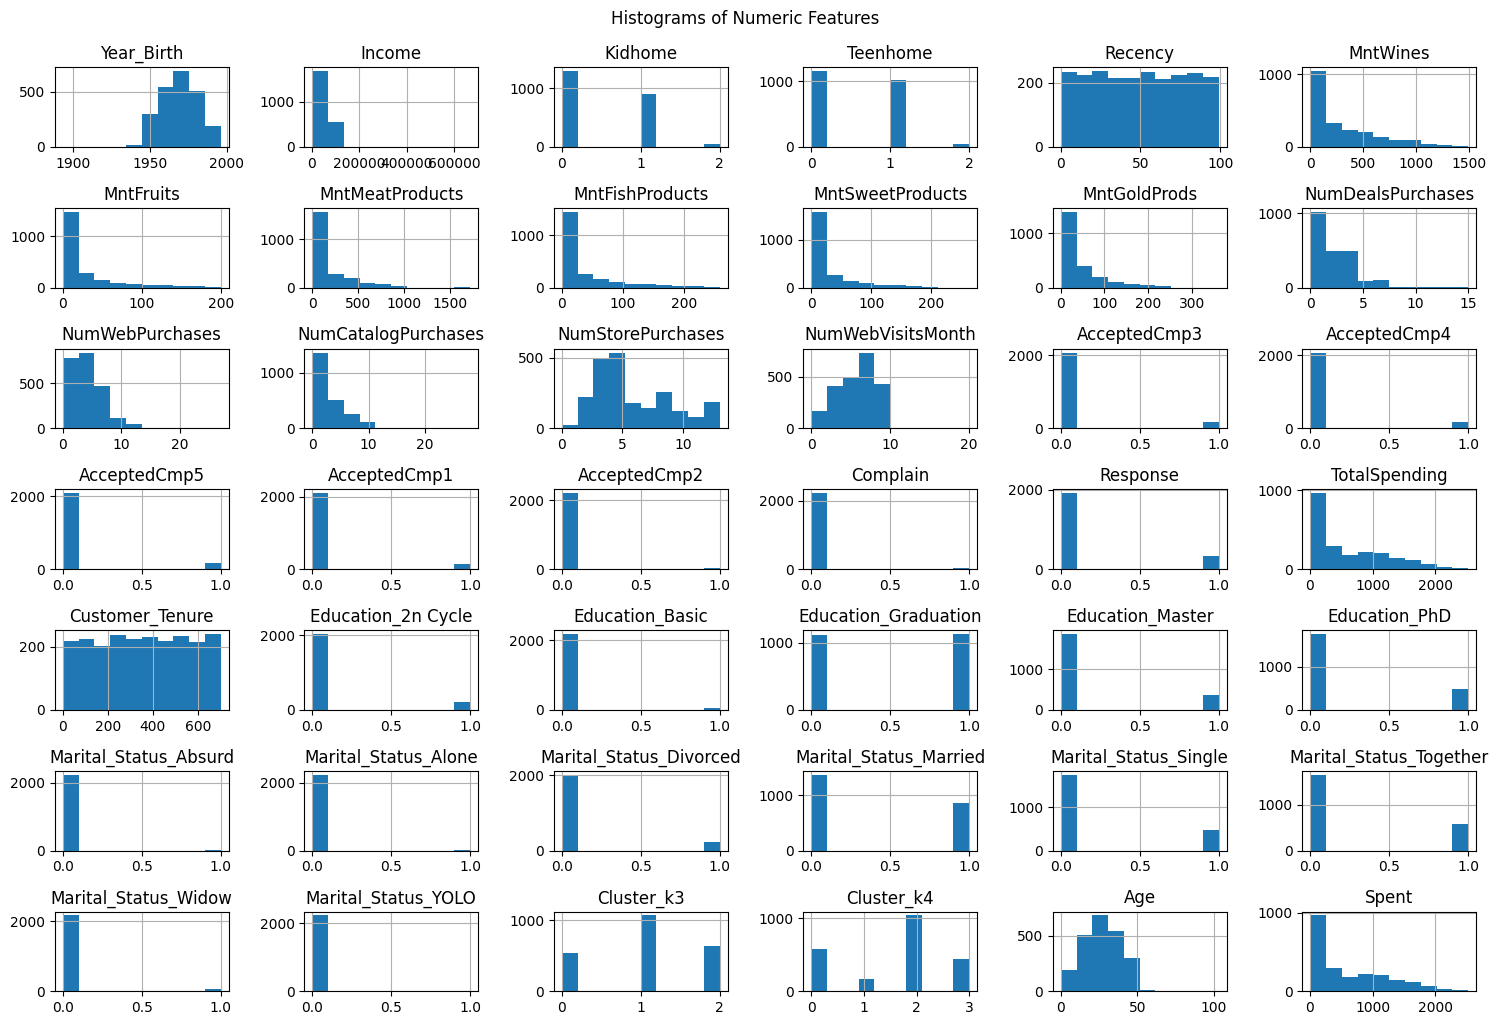

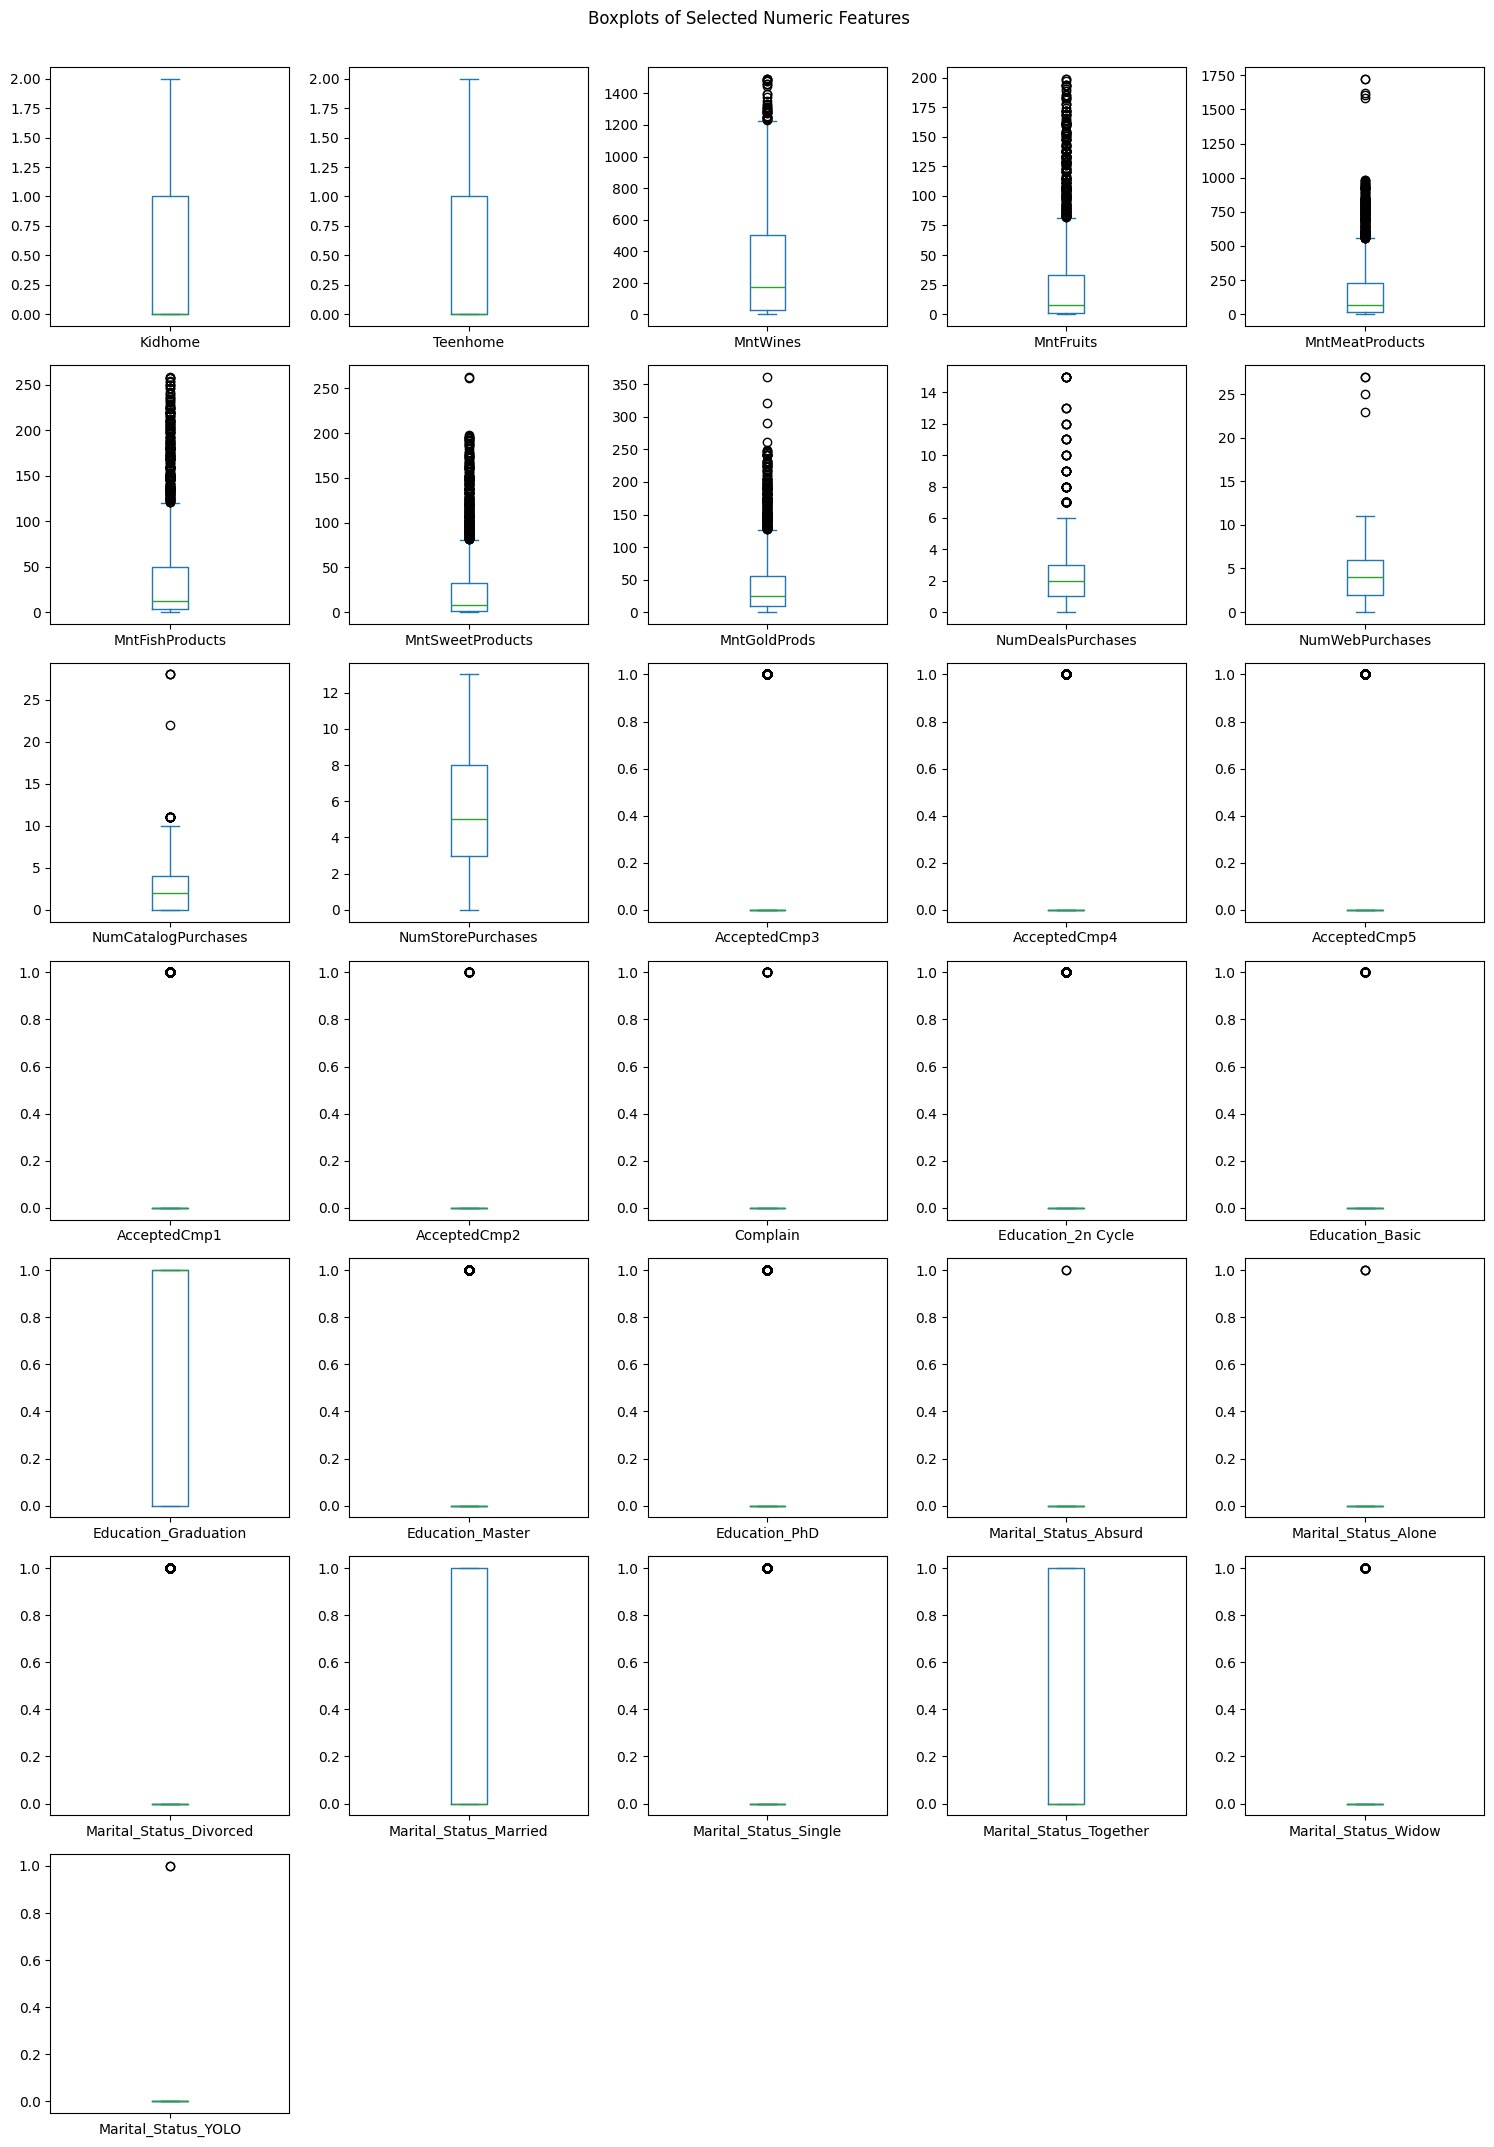


Categorical features have been encoded, skipping original categorical bar plots.


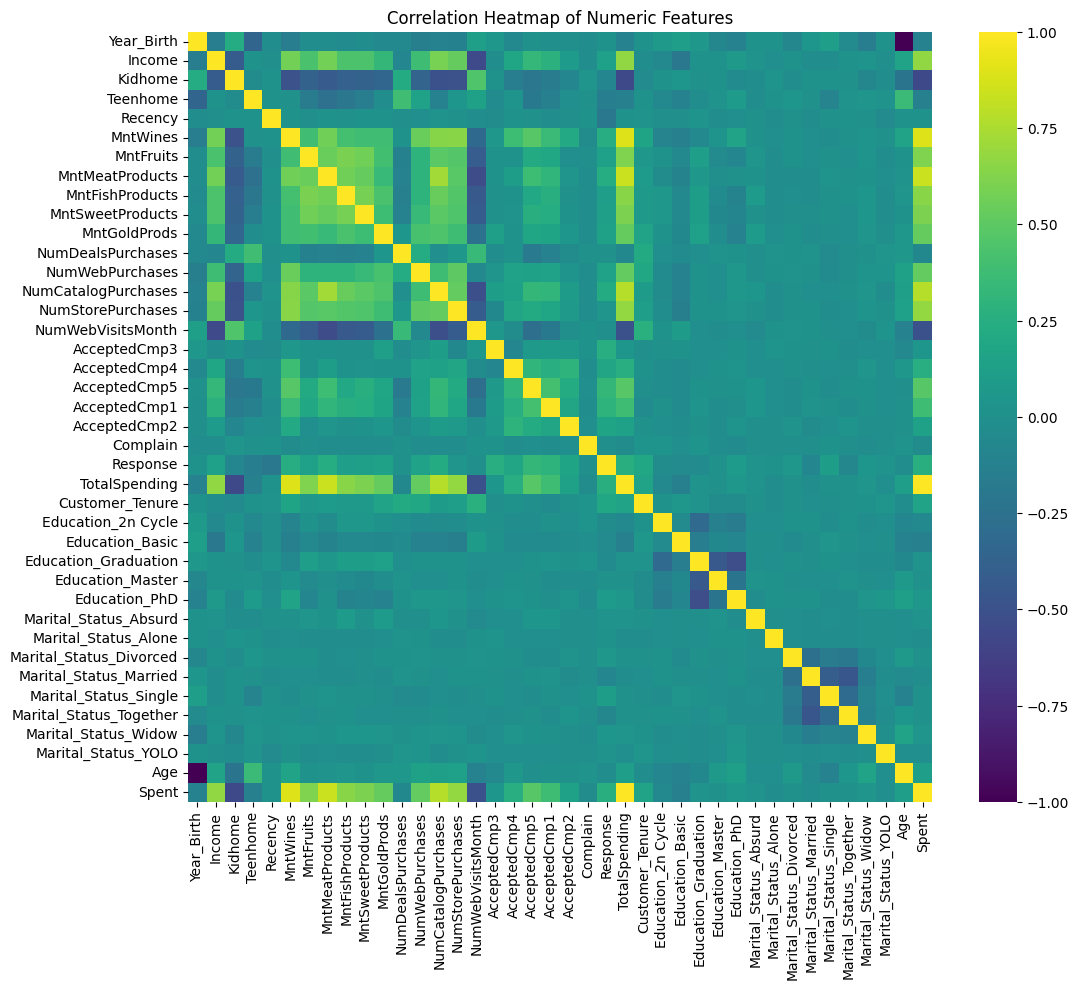

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numeric features
print("Summary Statistics for Numeric Features:")
display(df.describe())

# Histograms for numeric features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.savefig('histograms_numeric.png')
plt.show()

# Boxplots for numeric features (excluding those with very large ranges that would distort the plot)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Exclude columns that are clearly not suitable for boxplotting due to their nature or scale
cols_to_exclude = ['Year_Birth', 'Income', 'Recency', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'Response', 'Customer_Tenure', 'TotalSpending', 'Age', 'Spent', 'Cluster_k3', 'Cluster_k4'] # Add other columns as needed

boxplot_cols = [col for col in numeric_cols if col not in cols_to_exclude]

if boxplot_cols:
    n_cols = len(boxplot_cols)
    n_rows = (n_cols + 4) // 5 # Calculate number of rows needed for a max of 5 columns per row
    df[boxplot_cols].plot(kind='box', subplots=True, layout=(n_rows, 5), figsize=(15, n_rows * 3), sharex=False, sharey=False)
    plt.tight_layout()
    plt.suptitle('Boxplots of Selected Numeric Features', y=1.02)
    plt.savefig('boxplots_numeric.png')
    plt.show()
else:
    print("No suitable numeric columns for boxplotting after exclusions.")

# Since categorical columns have been one-hot encoded, bar plots are not directly applicable on the original columns.
# We can skip generating bar plots for the original categorical columns at this stage.
print("\nCategorical features have been encoded, skipping original categorical bar plots.")

# Correlation heatmap (excluding date column)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='viridis')
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('correlation_heatmap.png')
plt.show()

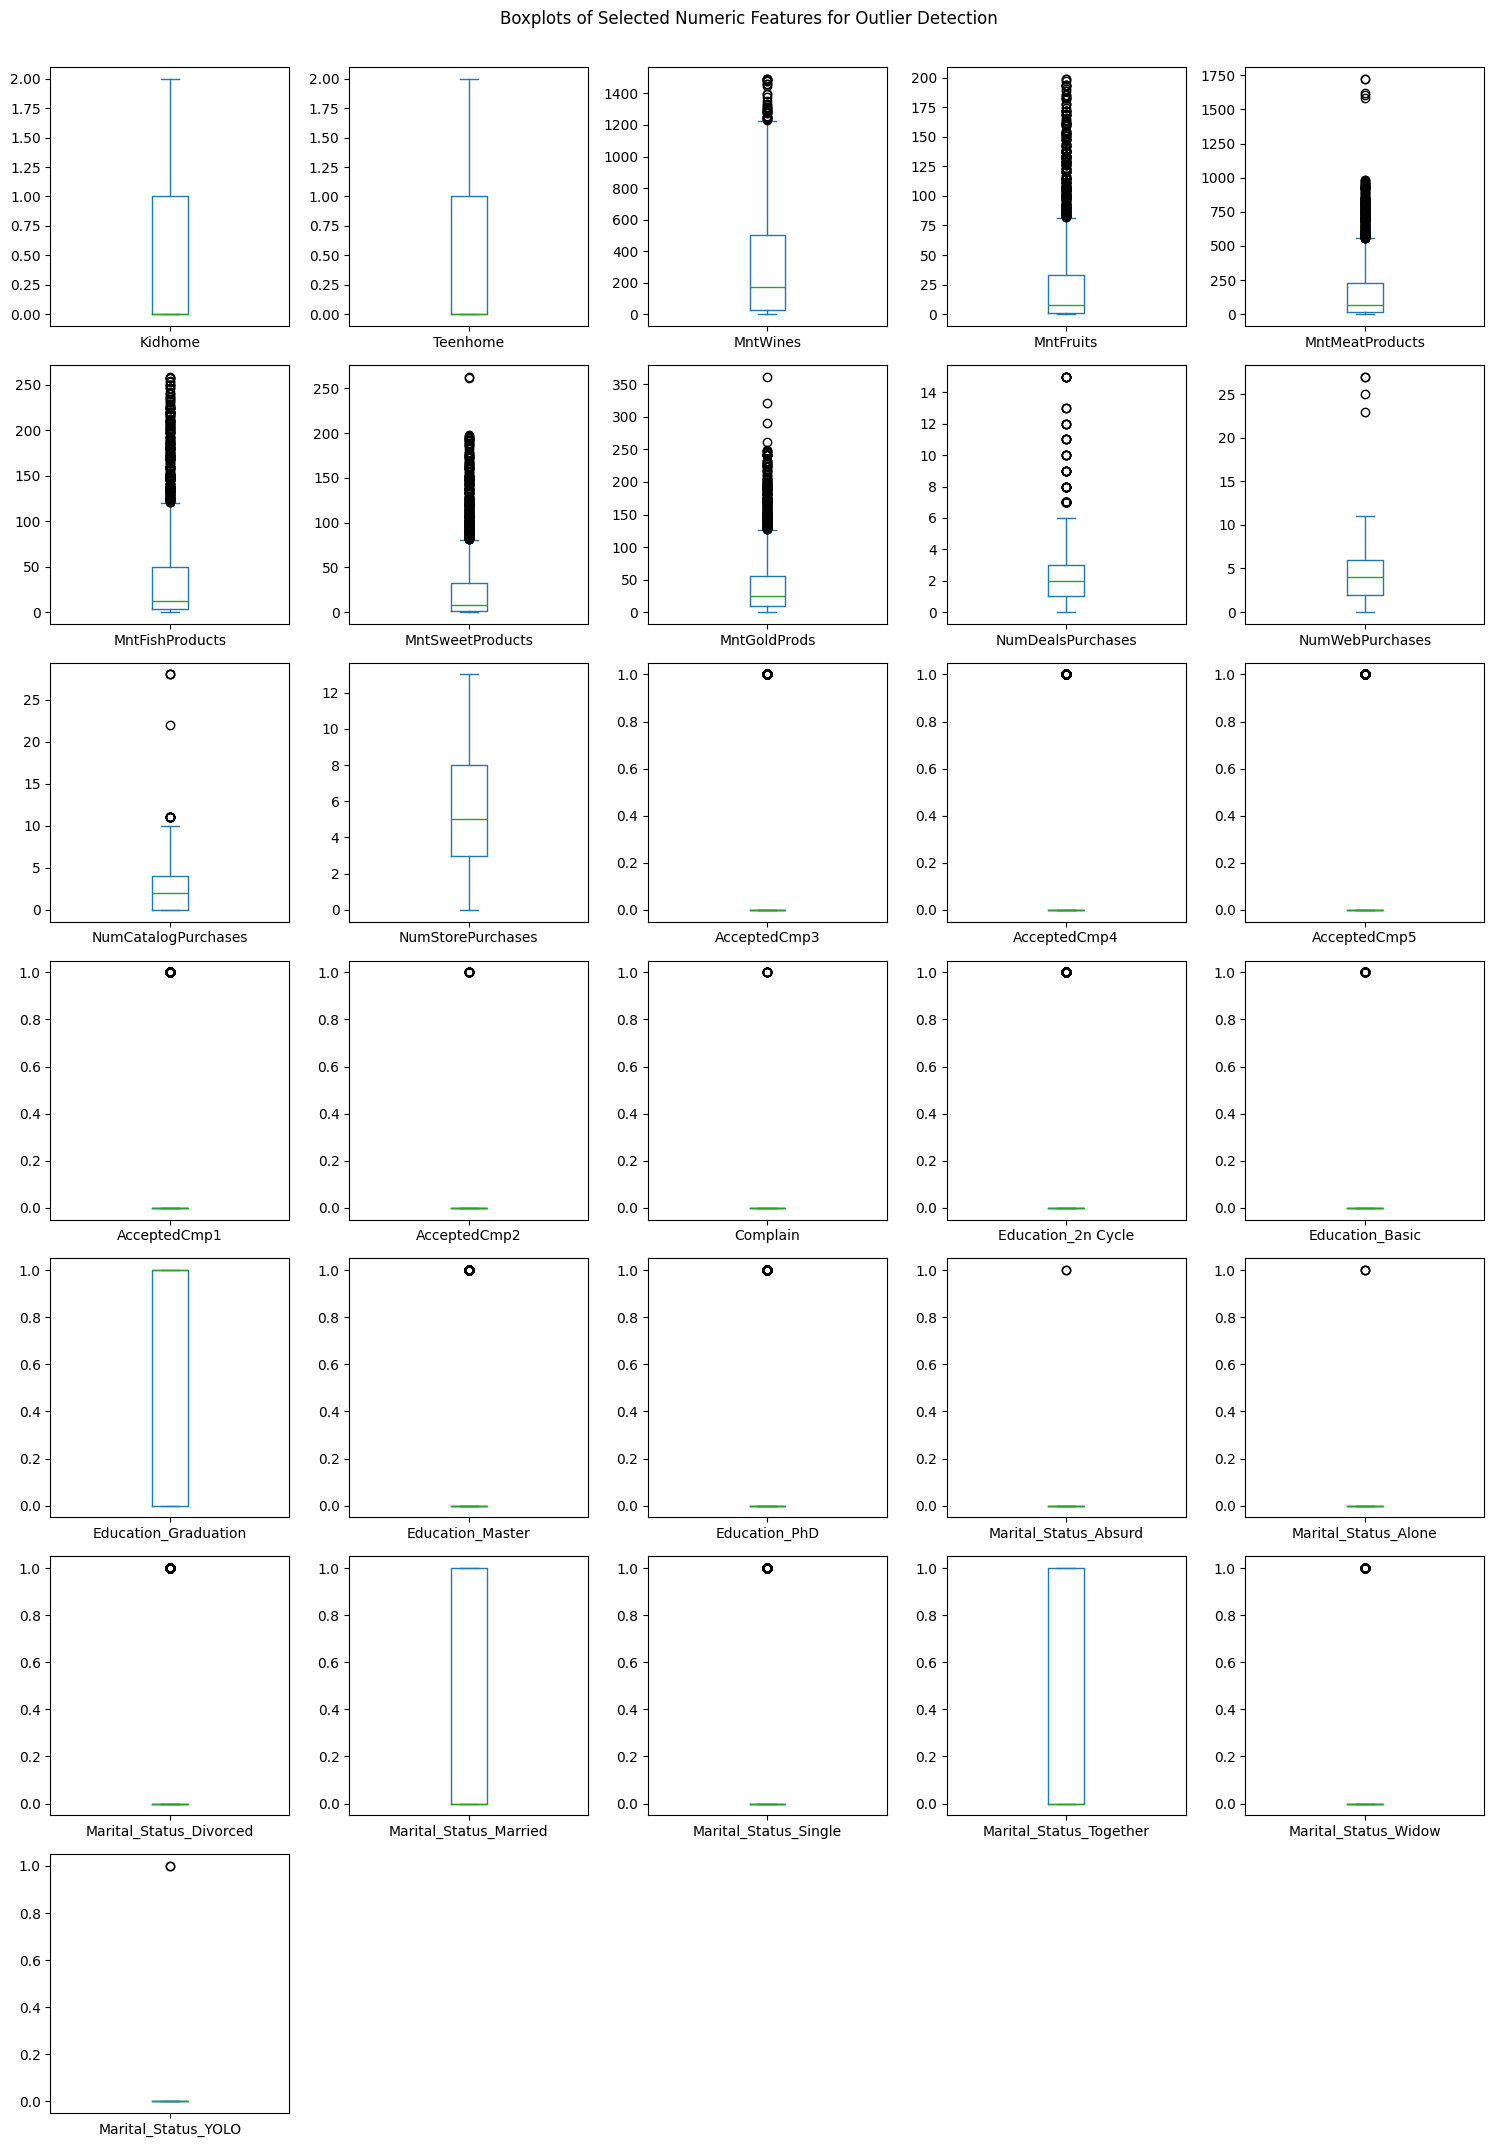

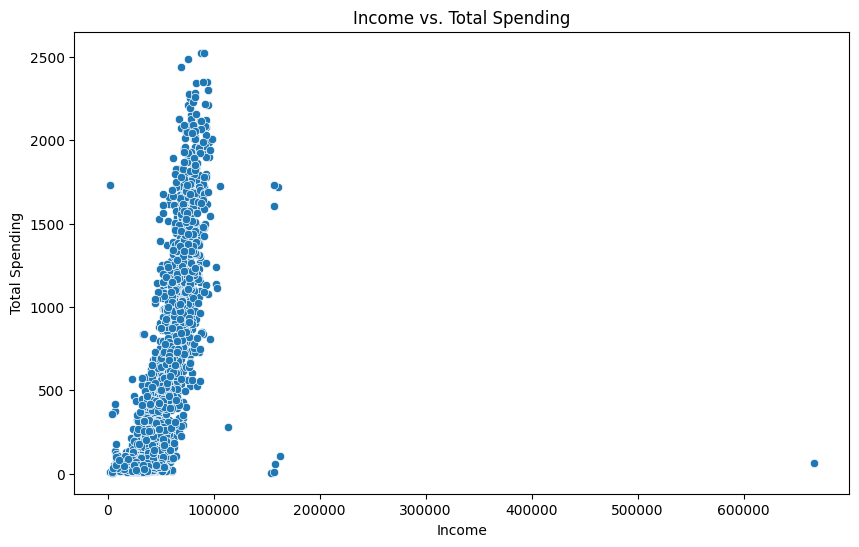

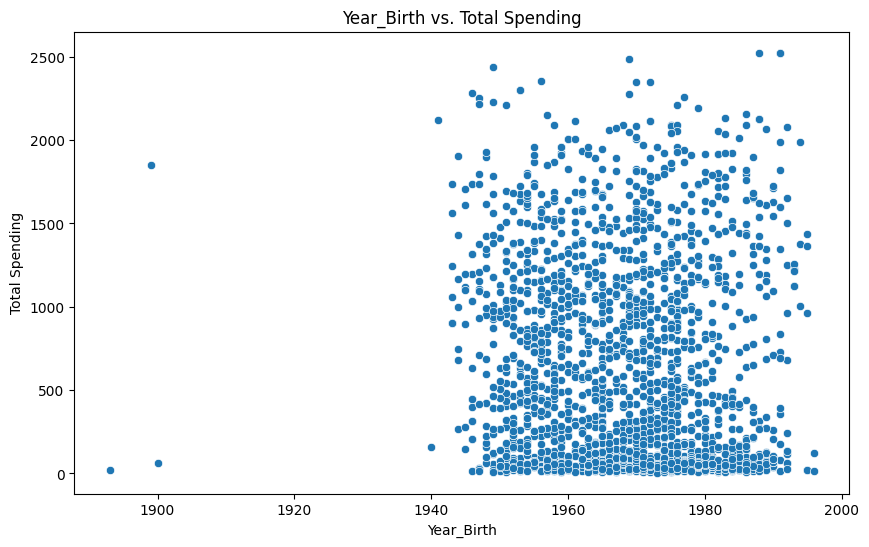

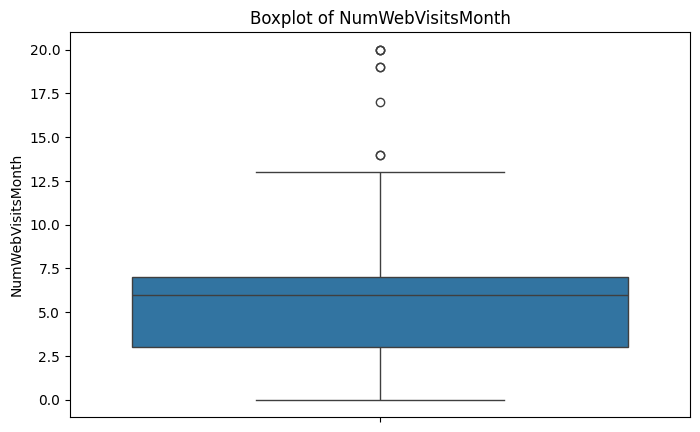

In [ ]:
# Outlier Detection using Boxplots for numeric features
# We will use the same columns selected for boxplotting in the EDA phase
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_to_exclude = ['Year_Birth', 'Income', 'Recency', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'Response', 'Customer_Tenure', 'TotalSpending', 'Age', 'Spent', 'Cluster_k3', 'Cluster_k4'] # Exclude columns as before

boxplot_cols = [col for col in numeric_cols if col not in cols_to_exclude]

if boxplot_cols:
    n_cols = len(boxplot_cols)
    n_rows = (n_cols + 4) // 5 # Calculate number of rows needed for a max of 5 columns per row
    df[boxplot_cols].plot(kind='box', subplots=True, layout=(n_rows, 5), figsize=(15, n_rows * 3), sharex=False, sharey=False)
    plt.tight_layout()
    plt.suptitle('Boxplots of Selected Numeric Features for Outlier Detection', y=1.02)
    plt.savefig('outlier_boxplots_numeric.png')
    plt.show()
else:
    print("No suitable numeric columns for boxplotting after exclusions.")

# Additional check for outliers in 'Year_Birth', 'Income', and 'NumWebVisitsMonth' using scatter plots or other methods if boxplots are not ideal
# Scatter plot for Income vs. Total Spending (sum of Mnt columns) to visualize potential income outliers
# df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1) # TotalSpending is already calculated

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df)
plt.title('Income vs. Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.savefig('scatterplot_income_totalspending.png')
plt.show()

# Scatter plot for Year_Birth vs. Total Spending to visualize potential age outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year_Birth', y='TotalSpending', data=df)
plt.title('Year_Birth vs. Total Spending')
plt.xlabel('Year_Birth')
plt.ylabel('Total Spending')
plt.savefig('scatterplot_yearbirth_totalspending.png')
plt.show()

# Boxplot for NumWebVisitsMonth
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['NumWebVisitsMonth'])
plt.title('Boxplot of NumWebVisitsMonth')
plt.ylabel('NumWebVisitsMonth')
plt.savefig('boxplot_numwebvisitsmonth.png')
plt.show()

In [ ]:
# Convert 'Dt_Customer' to datetime objects (already done in a previous step, but including for completeness of the cleaning process)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Calculate Customer_Tenure
# Assuming the current date is the latest date in the dataset plus one day to represent 'today' relative to the data collection period
latest_date = df['Dt_Customer'].max()
today = latest_date + pd.Timedelta(days=1)
df['Customer_Tenure'] = (today - df['Dt_Customer']).dt.days

# Drop the original 'Dt_Customer' column
df.drop('Dt_Customer', axis=1, inplace=True)

# Ensure numeric fields are correctly typed (already checked in previous steps, but good to confirm)
print("Data types after tenure calculation and dropping Dt_Customer:")
print(df.info())

Data types after tenure calculation and dropping Dt_Customer:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 

In [ ]:
# Drop irrelevant or redundant columns
# 'Z_CostContact' and 'Z_Revenue' appear to be constant based on describe() output
# 'ID' was already dropped in a previous step
cols_to_drop = ['Z_CostContact', 'Z_Revenue']
df.drop(cols_to_drop, axis=1, inplace=True)

# Display columns after dropping
print("Columns after dropping irrelevant features:")
print(df.columns)

Columns after dropping irrelevant features:
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'TotalSpending', 'Customer_Tenure'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns

# Using One-Hot Encoding for 'Education' and 'Marital_Status'
# Handle potential unknown values in the test set with handle_unknown='ignore'
if 'Education' in categorical_cols:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    education_encoded = ohe.fit_transform(df[['Education']])
    education_df = pd.DataFrame(education_encoded, columns=ohe.get_feature_names_out(['Education']))
    df = pd.concat([df.drop('Education', axis=1), education_df], axis=1)

if 'Marital_Status' in categorical_cols:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    marital_status_encoded = ohe.fit_transform(df[['Marital_Status']])
    marital_status_df = pd.DataFrame(marital_status_encoded, columns=ohe.get_feature_names_out(['Marital_Status']))
    df = pd.concat([df.drop('Marital_Status', axis=1), marital_status_df], axis=1)

print("\nData types after encoding categorical variables:")
print(df.info())


Data types after encoding categorical variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      224

In [ ]:
# Sanity check
# Show the final list of features and their data types
print("Final features and data types:")
print(df.info())

# Display the cleaned DataFrame's shape
print("\nShape of the cleaned DataFrame:", df.shape)

# Display the first few rows of the cleaned DataFrame
print("\nFirst 5 rows of the cleaned DataFrame:")
display(df.head())

Final features and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64 

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1957  58138.0        0         0       58       635         88   
1        1954  46344.0        1         1       38        11          1   
2        1965  71613.0        0         0       26       426         49   
3        1984  26646.0        1         0       26        11          4   
4        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_Master  \
0              546              172                88  ...               0.0   
1                6                2                 1  ...               0.0   
2              127              111                21  ...               0.0   
3               20               10                 3  ...               0.0   
4              118               46                27  ...               0.0   

   Education_PhD  Marital_Status_Absurd  Marital_Status_Alone  \
0            0.0                    0.0                   0.0   
1            0.0                    0.0                   0.0   
2            0.0                    0.0                   0.0   
3            0.0                    0.0                   0.0   
4            1.0                    0.0                   0.0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                      0.0                     0.0                    1.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     0.0                    0.0   
3                      0.0                     0.0                    0.0   
4                      0.0                     1.0                    0.0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                      0.0                   0.0                  0.0  
1                      0.0                   0.0                  0.0  
2                      1.0                   0.0                  0.0  
3                      1.0                   0.0                  0.0  
4                      0.0                   0.0                  0.0  

[5 rows x 38 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
# Apply StandardScaler to all numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Store the scaled data in a new DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Scaled DataFrame shape:", scaled_df.shape)
display(scaled_df.head())

Scaled DataFrame shape: (2240, 38)


Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.985345  0.235327 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1   -1.235733 -0.235826  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2   -0.317643  0.773633 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3    1.268149 -1.022732  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4    1.017761  0.241519  1.032559 -0.929894  1.550305 -0.389085   0.419916   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_Master  \
0         1.679702         2.462147          1.476500  ...         -0.444816   
1        -0.713225        -0.650449         -0.631503  ...         -0.444816   
2        -0.177032         1.345274         -0.146905  ...         -0.444816   
3        -0.651187        -0.503974         -0.583043  ...         -0.444816   
4        -0.216914         0.155164         -0.001525  ...         -0.444816   

   Education_PhD  Marital_Status_Absurd  Marital_Status_Alone  \
0      -0.526385              -0.029894             -0.036621   
1      -0.526385              -0.029894             -0.036621   
2      -0.526385              -0.029894             -0.036621   
3      -0.526385              -0.029894             -0.036621   
4       1.899751              -0.029894             -0.036621   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                -0.339909               -0.792406               1.914854   
1                -0.339909               -0.792406               1.914854   
2                -0.339909               -0.792406              -0.522233   
3                -0.339909               -0.792406              -0.522233   
4                -0.339909                1.261980              -0.522233   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                -0.591099             -0.188676            -0.029894  
1                -0.591099             -0.188676            -0.029894  
2                 1.691765             -0.188676            -0.029894  
3                 1.691765             -0.188676            -0.029894  
4                -0.591099             -0.188676            -0.029894  

[5 rows x 38 columns]

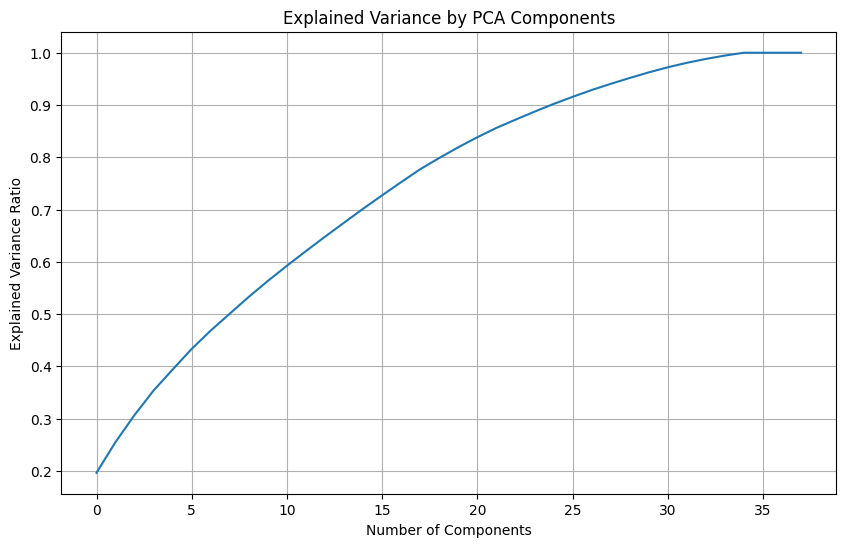

Cumulative Explained Variance:


array([0.19639925, 0.25516693, 0.30692459, 0.35382751, 0.39389068,
       0.43336826, 0.46846295, 0.50076681, 0.5329541 , 0.56341228,
       0.59239135, 0.62048273, 0.64799482, 0.67476199, 0.70147029,
       0.72715179, 0.7524484 , 0.77712777, 0.79858726, 0.81912395,
       0.83828853, 0.85612518, 0.87186615, 0.88718862, 0.90192805,
       0.91552302, 0.92855835, 0.94039056, 0.95168977, 0.96236056,
       0.97214261, 0.98067545, 0.98809881, 0.99457049, 1.        ,
       1.        , 1.        , 1.        ])


Number of components explaining at least 95% variance: 29

Shape of PCA transformed data: (2240, 29)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.214996 -0.549371 -0.412203  2.796556 -0.888934 -1.592762 -1.422278   
1 -2.574788 -0.613182 -0.289145 -0.410090 -1.204131  1.059660 -1.959116   
2  1.624447 -0.456139 -1.388526 -0.136103 -1.376902  0.464203  0.794533   
3 -2.679131 -1.581642 -0.046185  0.126869 -1.304749  0.840650  1.016957   
4 -0.567733  0.168601 -0.094037 -0.768384  1.937985 -0.411632 -0.168027   

        PC8       PC9      PC10  ...      PC20      PC21      PC22      PC23  \
0  0.203914 -0.553675 -0.245057  ... -1.554468  1.284494  0.600189 -0.605349   
1  0.770066 -0.340490 -0.120936  ... -0.456473  0.927860 -0.085897  0.216074   
2 -0.621582  0.164912 -0.879412  ...  0.066264 -1.107932  0.499865 -0.320239   
3 -0.574049  0.221773 -1.003378  ...  0.951650 -0.586455 -0.013907 -0.001881   
4 -1.258854 -0.906966 -0.231881  ...  1.639920  0.336654  0.626482 -0.093900   

       PC24      PC25      PC26      PC27      PC28      PC29  
0 -0.190985  1.447281 -0.475930  1.190948  0.042218  0.586341  
1 -0.370808  0.166760 -0.537953 -0.267665  0.303679  0.011820  
2  0.196114 -0.086242 -0.775804  0.605401  0.228418 -1.045322  
3  0.209163  0.130997 -0.204456  0.183814 -0.385570  0.037278  
4 -0.302001  0.634918  0.157397  0.564852 -0.102394 -0.286446  

[5 rows x 29 columns]

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA
# It's a good practice to start with a large number of components to see the explained variance
pca = PCA()
pca.fit(scaled_df)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.savefig('pca_explained_variance.png')
plt.show()

# Choose the number of components that explain ~90-95% variance
# Based on the plot, we will visually inspect to find the number of components
# Let's print the cumulative explained variance to help in the selection
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:")
display(cumulative_variance)

# Based on the cumulative variance, select the number of components
# For example, if we aim for ~95% variance, we can find the number of components needed
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1 # Find the first index where variance is >= 0.95

print(f"\nNumber of components explaining at least 95% variance: {n_components}")

# Transform the data with the selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_df)

# Store the PCA transformed data in a DataFrame (optional, but can be helpful)
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

print("\nShape of PCA transformed data:", pca_df.shape)
display(pca_df.head())

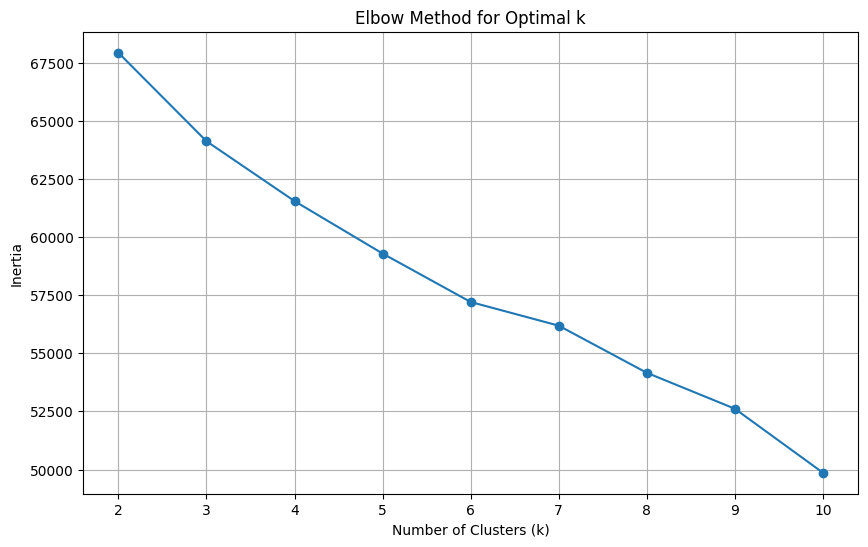

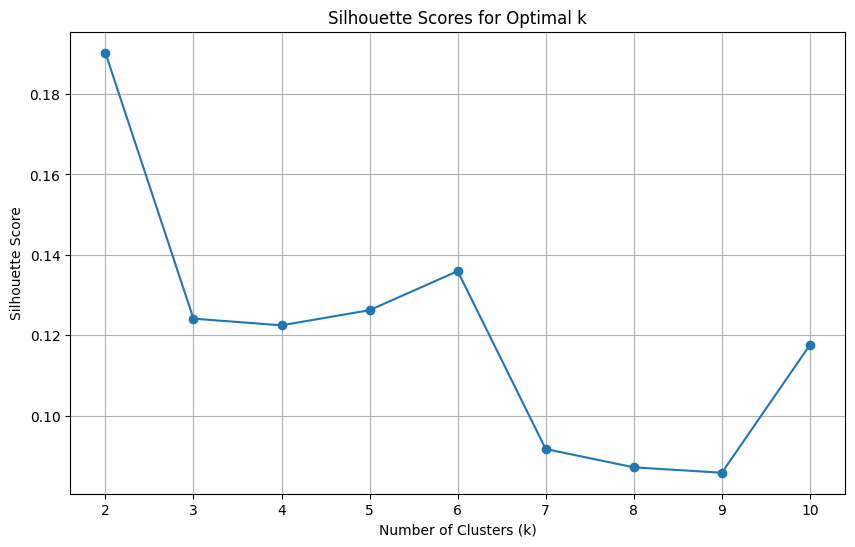

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering evaluation (Elbow Method and Silhouette Score)
inertia = []
silhouette_scores = []
k_range = range(2, 11) # Testing k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    # Silhouette score is defined for k > 1, and we are starting k_range from 2
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
# The x-axis for silhouette scores should correspond to the k values from 2 to 10
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('silhouette_scores.png')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Run final KMeans clustering for k=3 and k=4
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_k3.fit(pca_data)
df['Cluster_k3'] = kmeans_k3.labels_

kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_k4.fit(pca_data)
df['Cluster_k4'] = kmeans_k4.labels_

print("Cluster labels for k=3 and k=4 added to the DataFrame.")
display(df.head())

Cluster labels for k=3 and k=4 added to the DataFrame.


Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1957  58138.0        0         0       58       635         88   
1        1954  46344.0        1         1       38        11          1   
2        1965  71613.0        0         0       26       426         49   
3        1984  26646.0        1         0       26        11          4   
4        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0              546              172                88  ...   
1                6                2                 1  ...   
2              127              111                21  ...   
3               20               10                 3  ...   
4              118               46                27  ...   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                    0.0                   0.0                      0.0   
1                    0.0                   0.0                      0.0   
2                    0.0                   0.0                      0.0   
3                    0.0                   0.0                      0.0   
4                    0.0                   0.0                      0.0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                     0.0                    1.0                      0.0   
1                     0.0                    1.0                      0.0   
2                     0.0                    0.0                      1.0   
3                     0.0                    0.0                      1.0   
4                     1.0                    0.0                      0.0   

   Marital_Status_Widow  Marital_Status_YOLO  Cluster_k3  Cluster_k4  
0                   0.0                  0.0           0           3  
1                   0.0                  0.0           1           2  
2                   0.0                  0.0           2           3  
3                   0.0                  0.0           1           2  
4                   0.0                  0.0           1           2  

[5 rows x 40 columns]

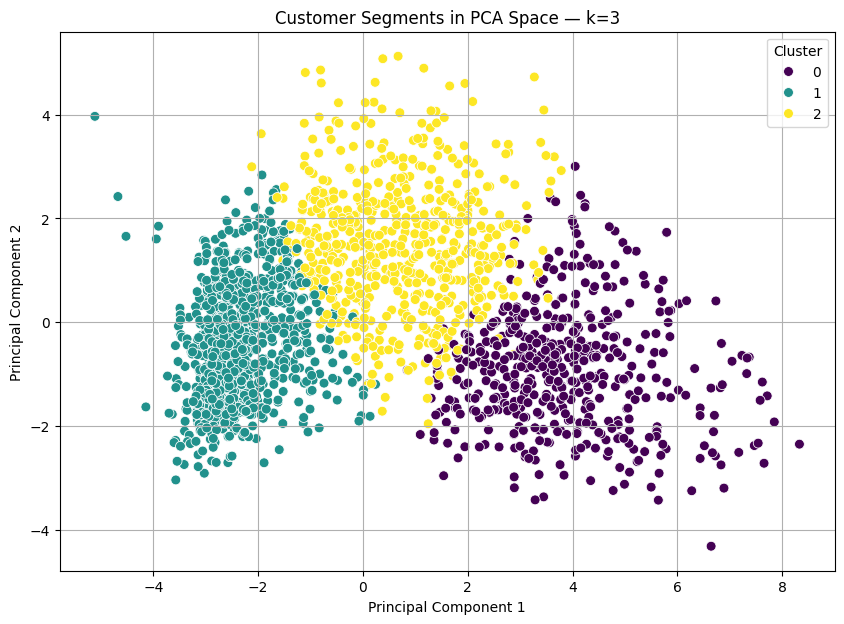

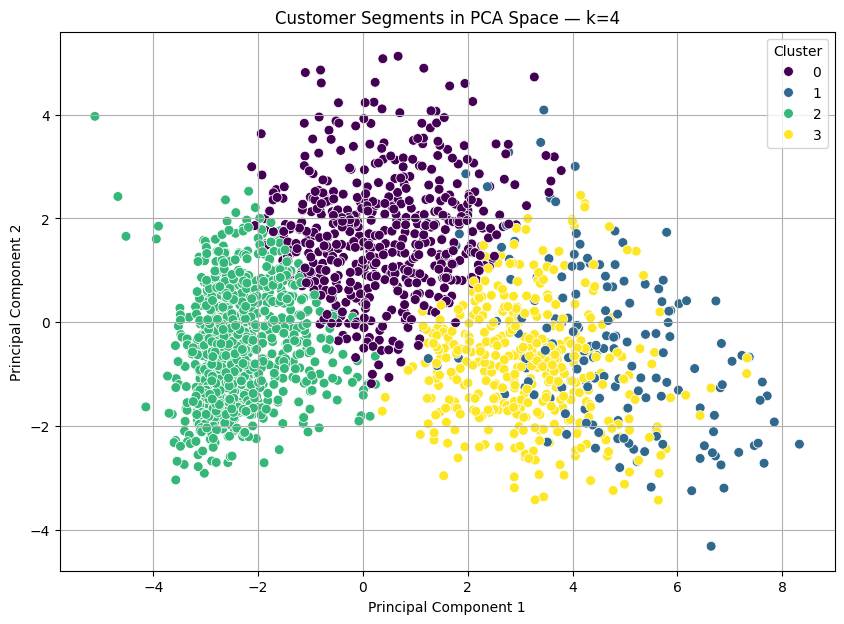

In [ ]:
# Visualize clusters using the first 2 PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Cluster_k3'], palette='viridis', s=50)
plt.title('Customer Segments in PCA Space — k=3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('customer_segments_pca_k3.png')
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Cluster_k4'], palette='viridis', s=50)
plt.title('Customer Segments in PCA Space — k=4')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('customer_segments_pca_k4.png')
plt.show()

In [ ]:
# Cluster Profiling for k=3
print("Cluster Profile for k=3:")
display(df.groupby('Cluster_k3')[['Income', 'Customer_Tenure', 'Recency', 'TotalSpending', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].mean())

# Cluster Profiling for k=4
print("\nCluster Profile for k=4:")
display(df.groupby('Cluster_k4')[['Income', 'Customer_Tenure', 'Recency', 'TotalSpending', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].mean())

Cluster Profile for k=3:


Income  Customer_Tenure    Recency  TotalSpending   Kidhome  \
Cluster_k3                                                                      
0           78211.899451       354.983240  49.575419    1421.007449  0.037244   
1           35535.637914       322.553471  49.562852     102.721388  0.791745   
2           58325.059672       407.843014  47.957614     760.448980  0.205651   

            Teenhome    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster_k3                                                                      
0           0.143389  625.512104  68.456238       477.649907       100.733706   
1           0.454972   44.681051   5.115385        24.439962         7.373358   
2           0.897959  466.697017  26.221350       143.511774        34.698587   

            MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster_k3                                                      
0                  70.906890     77.748603           1.238361   
1                   5.248593     15.863039           2.096623   
2                  26.607535     62.712716           3.623234   

            NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster_k3                                                            
0                  5.048417             6.145251           8.316574   
1                  2.162289             0.585366           3.255159   
2                  6.489796             3.200942           7.902669   

            NumWebVisitsMonth  
Cluster_k3                     
0                    2.724395  
1                    6.427767  
2                    5.642072


Cluster Profile for k=4:


Income  Customer_Tenure    Recency  TotalSpending   Kidhome  \
Cluster_k4                                                                      
0           56922.844632       412.081597  47.562500     708.748264  0.251736   
1           81386.402873       359.651429  49.440000    1624.474286  0.051429   
2           35227.078862       319.459615  49.610577      98.236538  0.787500   
3           74315.149233       360.195991  49.804009    1252.338530  0.048998   

            Teenhome    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster_k4                                                                      
0           0.940972  454.277778  20.157986       128.296875        26.762153   
1           0.131429  880.177143  55.840000       469.108571        77.005714   
2           0.441346   41.113462   5.136538        23.612500         7.549038   
3           0.244989  495.240535  71.697105       430.775056       105.378619   

            MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster_k4                                                      
0                  20.326389     58.927083           3.895833   
1                  64.771429     77.571429           1.051429   
2                   5.324038     15.500962           2.020192   
3                  71.360802     77.886414           1.512249   

            NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster_k4                                                            
0                  6.345486             3.003472           7.682292   
1                  5.422857             6.022857           8.200000   
2                  2.102885             0.559615           3.219231   
3                  5.253898             5.783964           8.378619   

            NumWebVisitsMonth  
Cluster_k4                     
0                    5.904514  
1                    3.051429  
2                    6.408654  
3                    2.915367

## Analysis Summary and Recommendations

### Exploratory Data Analysis (EDA) Insights:

*   **Income Distribution:** The income distribution is skewed towards lower values, with a few high-income outliers.
*   **Age Distribution:** The customer base is concentrated in a particular age range (late 1960s to early 1970s birth years), with some older outliers.
*   **Marital Status:** The majority of customers are either 'Married' or 'Together'.
*   **Product Spending:** Spending on wine is significantly higher than on other product categories, and there are many customers with very low spending on most products.
*   **Campaign Acceptance:** Individual marketing campaigns have relatively low acceptance rates.

### Clustering Findings (KMeans on PCA-transformed data):

Based on the Elbow Method and Silhouette Scores, both k=3 and k=4 were considered as potential optimal numbers of clusters.

**Cluster Profiles (k=3):**

*   **Cluster 0 (High-Spending Adults):** Characterized by high income, high total spending (especially on wines and meat), and few or no children.
*   **Cluster 1 (Lower-Income Families, Deal Seekers):** Characterized by lower income, very low total spending, higher numbers of kids and teens, and higher engagement with web visits and deals.
*   **Cluster 2 (Moderate to High-Income Wine Enthusiasts):** Characterized by moderate to high income, moderate to high total spending with a focus on wine, and mixed family situations.

**Cluster Profiles (k=4):**

*   **Cluster 0 (Moderate-Income Families with Teens):** Moderate income and spending, higher number of teens, and preference for web and store purchases.
*   **Cluster 1 (Affluent High-Spenders, Catalog & Store Shoppers):** High income and very high spending (especially on wine and meat), few children, and preference for catalog and store purchases.
*   **Cluster 2 (Lower-Income Families, Deal Seekers):** Lower income and very low spending, higher number of kids and teens, and higher engagement with web visits and deals (similar to k=3 Cluster 1).
*   **Cluster 3 (High-Income Diverse Spenders):** High income and high spending across various categories (wine, fruits, meat, gold), few children, and preference for catalog and store purchases.

### Recommendation:

While both solutions offer valuable insights, the **k=4** clustering provides a slightly more nuanced segmentation of the higher-spending customer base. Therefore, **k=4** is recommended for a more detailed understanding of customer segments.

The PCA plots visualizing the clusters for both k=3 and k=4 have been generated and saved as `customer_segments_pca_k3.png` and `customer_segments_pca_k4.png`.

<Figure size 1500x1500 with 0 Axes>

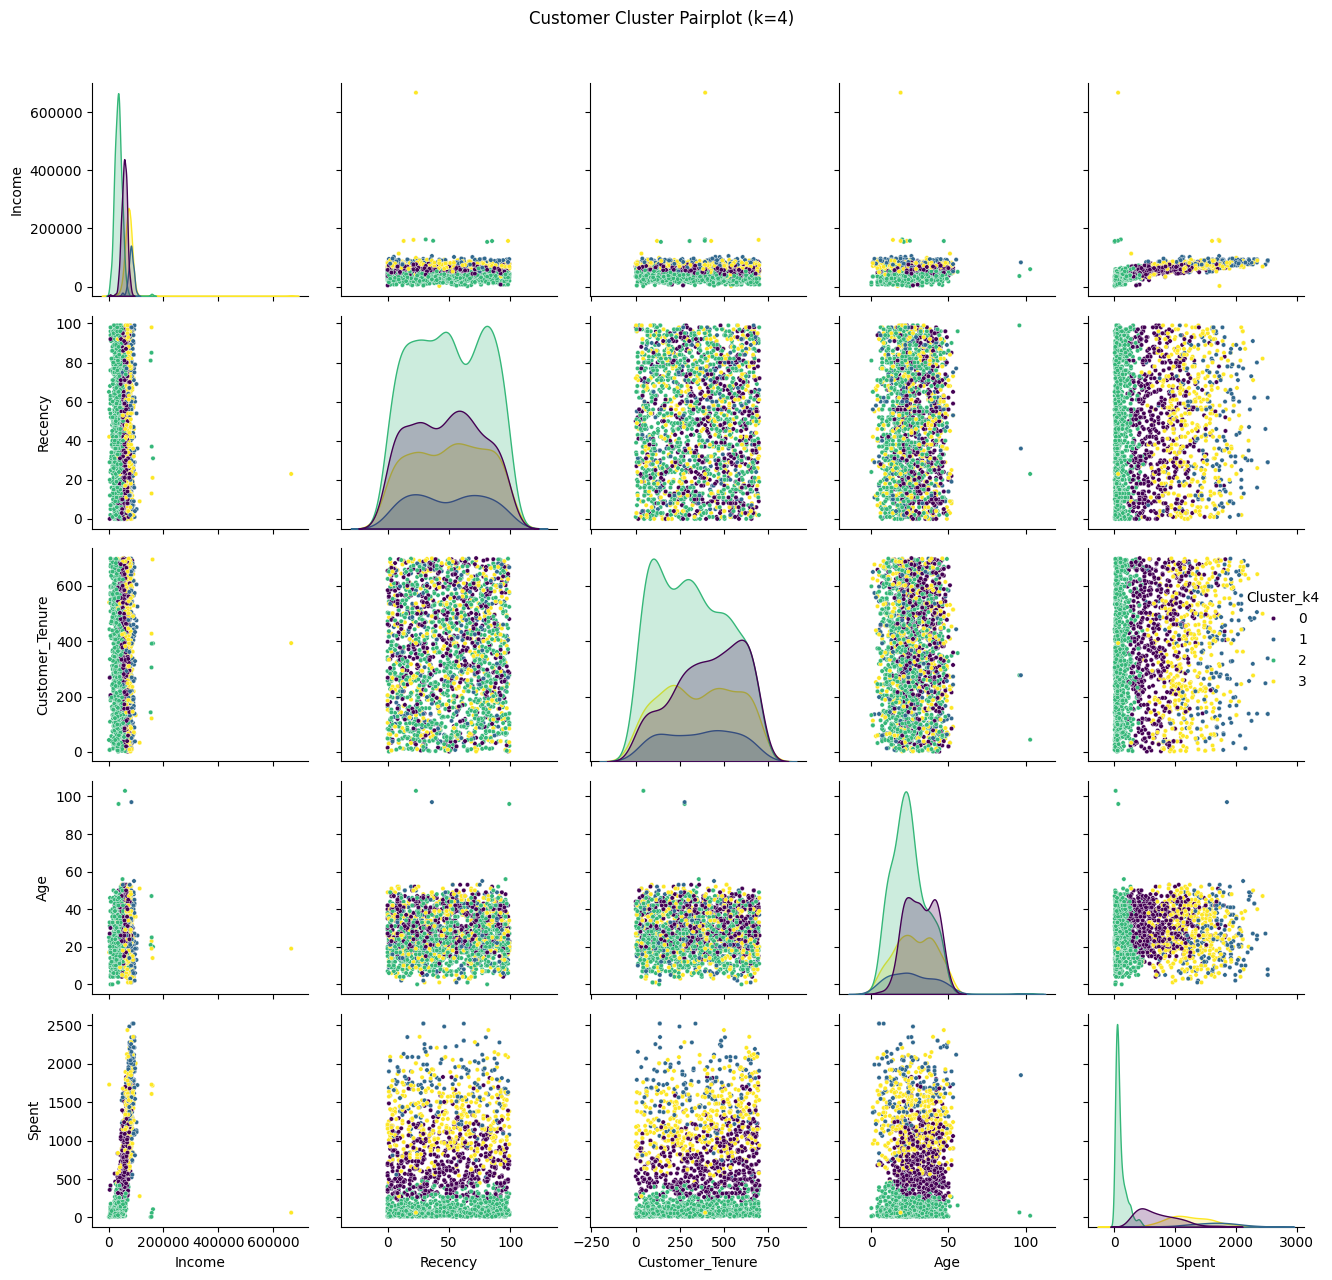

In [ ]:
# Re-calculate Customer_Tenure to ensure it's correct and based on the latest date in the dataset
# Assuming the original df still contains 'Dt_Customer' or we need to reload/recreate it.
# Based on the notebook state, 'Dt_Customer' was dropped after calculating Customer_Tenure.
# Let's re-create TotalSpending and Customer_Tenure from the original df if necessary,
# or assume the current df has the correct Customer_Tenure and TotalSpending.
# Given the current df state includes Customer_Tenure and TotalSpending, I will proceed with those.

# Calculate Age from Year_Birth using the latest year in the dataset
latest_year = df['Year_Birth'].max() # Assuming latest year is sufficient for a relative age
df['Age'] = latest_year - df['Year_Birth']

# Calculate total spending
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Select columns for plotting
plot_cols = ['Income', 'Recency', 'Customer_Tenure', 'Age', 'Spent', 'Cluster_k4']

# Ensure selected columns exist in the DataFrame
missing_cols = [col for col in plot_cols if col not in df.columns]
if missing_cols:
    print(f"Error: The following columns are missing from the DataFrame: {missing_cols}")
else:
    # Create Seaborn Pairplot
    plt.figure(figsize=(15, 15)) # Adjust figure size as needed
    sns.pairplot(df[plot_cols], hue="Cluster_k4", palette='viridis', diag_kind='kde', plot_kws={'s': 10})
    plt.suptitle('Customer Cluster Pairplot (k=4)', y=1.02) # Add a title
    plt.tight_layout()

    # Export Visual
    plt.savefig('cluster_pairplot_k4.png')
    plt.show()

In [ ]:
# Data Prep
# Use the cleaned dataset (df)
# Drop irrelevant columns: 'ID' and 'Dt_Customer' were already dropped.
# 'Z_CostContact' and 'Z_Revenue' were also dropped as irrelevant.
# Keep the 'Cluster_k4' feature.

# Ensure all features are numeric; encode if necessary
# We have already performed one-hot encoding for categorical variables.

# Define X as features, y as the Response column
X = df.drop('Response', axis=1)
y = df['Response']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2240, 41)
Shape of y: (2240,)


In [ ]:
from sklearn.model_selection import train_test_split

# Train/Test Split
# Use stratified train-test split (e.g., test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1792, 41)
Shape of X_test: (448, 41)
Shape of y_train: (1792,)
Shape of y_test: (448,)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 267, number of negative: 1525
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2364
[LightGBM] [Info] Number of data points in the train set: 1792, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148996 -> initscore=-1.742501
[LightGBM] [Info] Start training from score -1.742501
Model Evaluation Metrics:
Accuracy: 0.8929
AUC: 0.9015
Precision: 0.7317
Recall: 0.4478
F1-Score: 0.5556


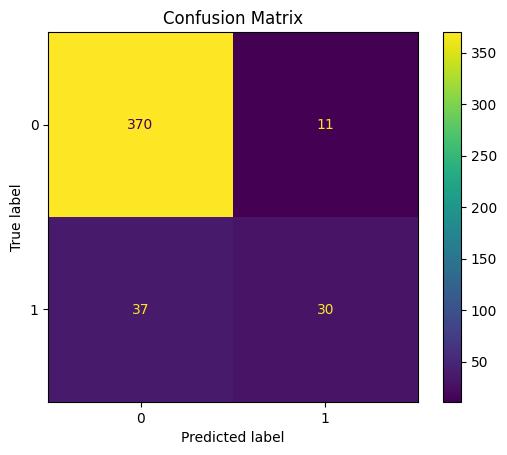

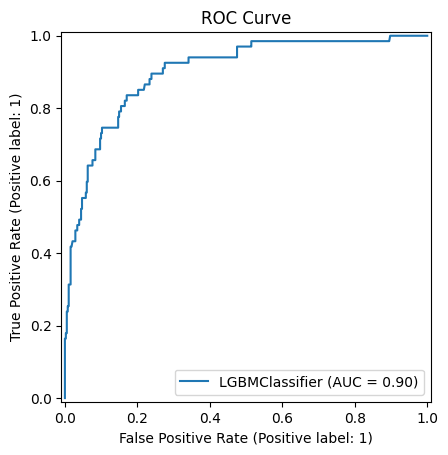


SHAP Interpretation:


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


Shape of shap_values: (448, 41)
shap_values is not a list. Using shap_values directly.
Shape of X_test: (448, 41)
Shape of SHAP values used for plotting: (448, 41)
Shape of SHAP values matches the shape of X_test.

SHAP Summary Plot (dot):


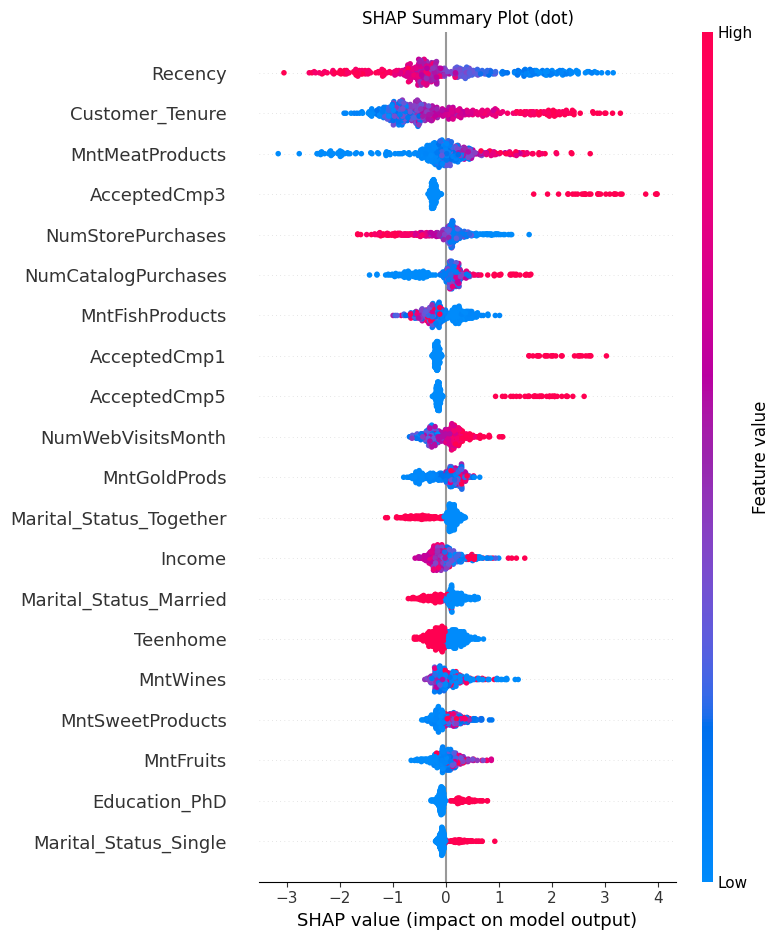


SHAP Bar Plot (Mean Absolute SHAP Values):


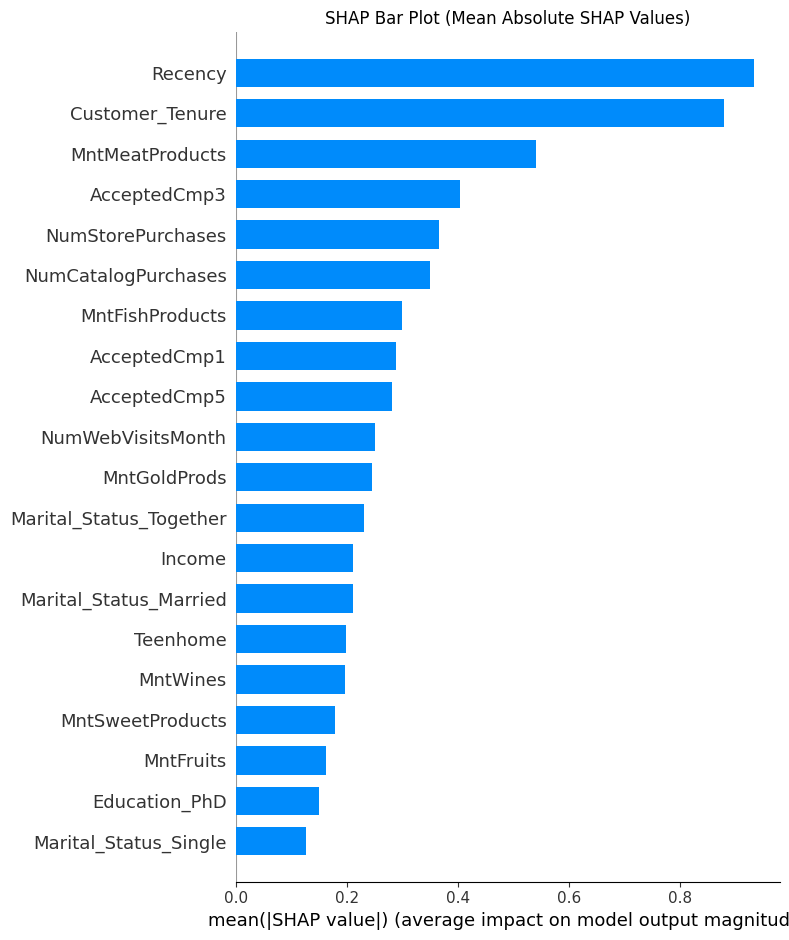


SHAP Dependence Plot for Top Feature: Recency


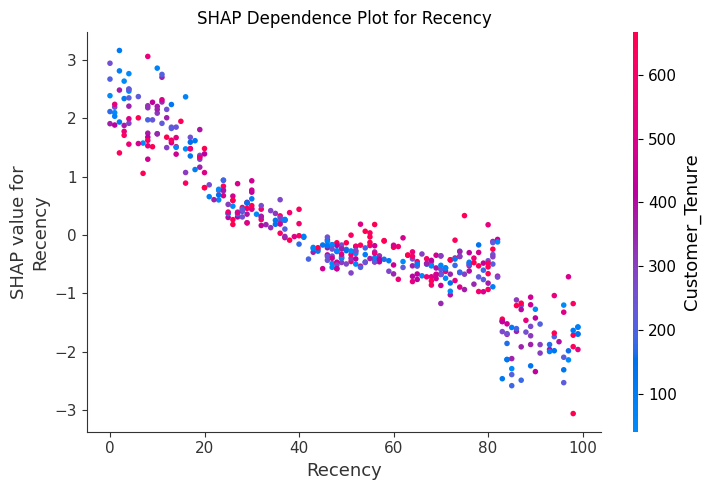

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import shap
import numpy as np # Import numpy

# Modeling
# Train a LightGBM classifier on the training set
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Predictions
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# ROC Curve
roc_disp = RocCurveDisplay.from_estimator(lgbm, X_test, y_test)
plt.title('ROC Curve')
plt.savefig('roc_curve.png')
plt.show()

# SHAP Interpretation
print("\nSHAP Interpretation:")
# Use TreeExplainer for LightGBM
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

# Check the shape and structure of shap_values
print(f"Shape of shap_values: {np.shape(shap_values)}")
if isinstance(shap_values, list):
    print(f"shap_values is a list. Length: {len(shap_values)}")
    if len(shap_values) > 1:
        print(f"Shape of shap_values[0] (class 0): {np.shape(shap_values[0])}")
        print(f"Shape of shap_values[1] (class 1): {np.shape(shap_values[1])}")
        # For binary classification, use shap_values[1] for the positive class
        shap_values_to_plot = shap_values[1]
    else:
        print("shap_values list has only one element. Using shap_values[0].")
        shap_values_to_plot = shap_values[0]
else:
    print("shap_values is not a list. Using shap_values directly.")
    shap_values_to_plot = shap_values

# Verify that the SHAP values match the shape of X_test
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of SHAP values used for plotting: {shap_values_to_plot.shape}")

if shap_values_to_plot.shape != X_test.shape:
    print("Warning: The shape of SHAP values does not match the shape of X_test.")
    print("This might cause issues with plotting.")
else:
    print("Shape of SHAP values matches the shape of X_test.")


# SHAP summary plot (beeswarm / dot)
print("\nSHAP Summary Plot (dot):")
shap.summary_plot(shap_values_to_plot, X_test, plot_type="dot", show=False)
plt.title('SHAP Summary Plot (dot)')
plt.tight_layout()
plt.savefig('shap_summary_plot_dot.png')
plt.show()

# SHAP bar plot of mean absolute SHAP values
print("\nSHAP Bar Plot (Mean Absolute SHAP Values):")
shap.summary_plot(shap_values_to_plot, X_test, plot_type="bar", show=False)
plt.title('SHAP Bar Plot (Mean Absolute SHAP Values)')
plt.tight_layout()
plt.savefig('shap_bar_plot.png')
plt.show()

# Optional: SHAP dependence plot for top feature
# Identify the top feature from the SHAP bar plot (assuming the first feature in the bar plot is the most important)
top_feature_index = np.argsort(np.abs(shap_values_to_plot).mean(0))[::-1][0]
top_feature_name = X_test.columns[top_feature_index]
print(f"\nSHAP Dependence Plot for Top Feature: {top_feature_name}")
shap.dependence_plot(top_feature_name, shap_values_to_plot, X_test, show=False)
plt.title(f'SHAP Dependence Plot for {top_feature_name}')
plt.tight_layout()
plt.savefig(f'shap_dependence_plot_{top_feature_name}.png')
plt.show()

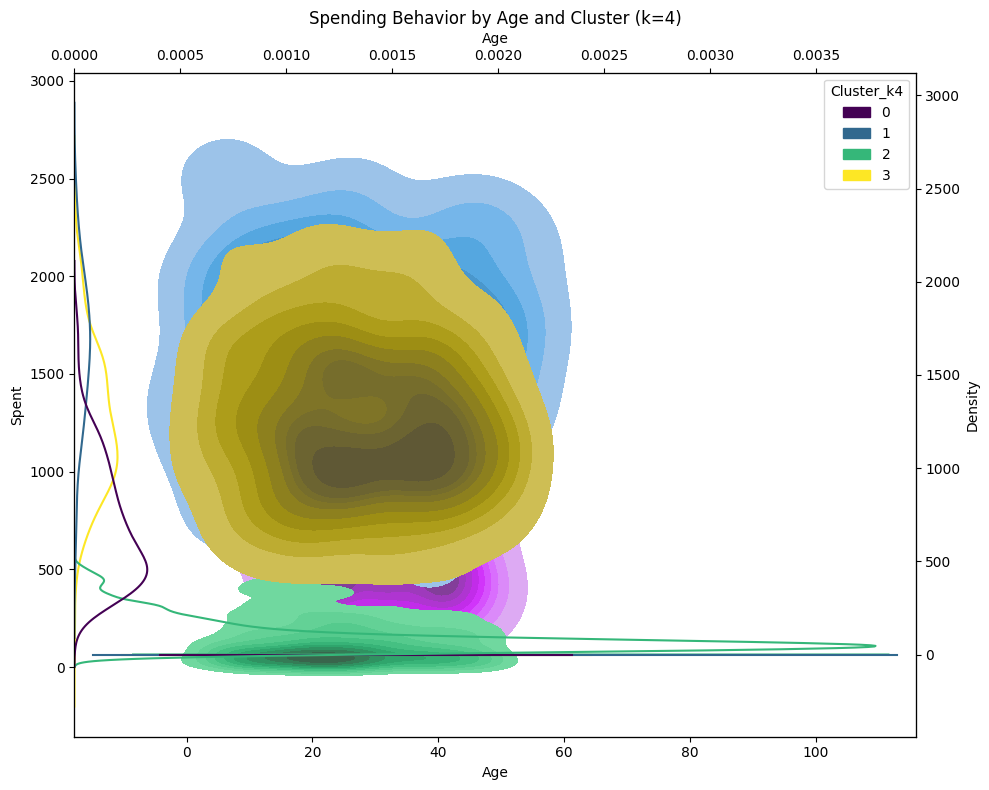

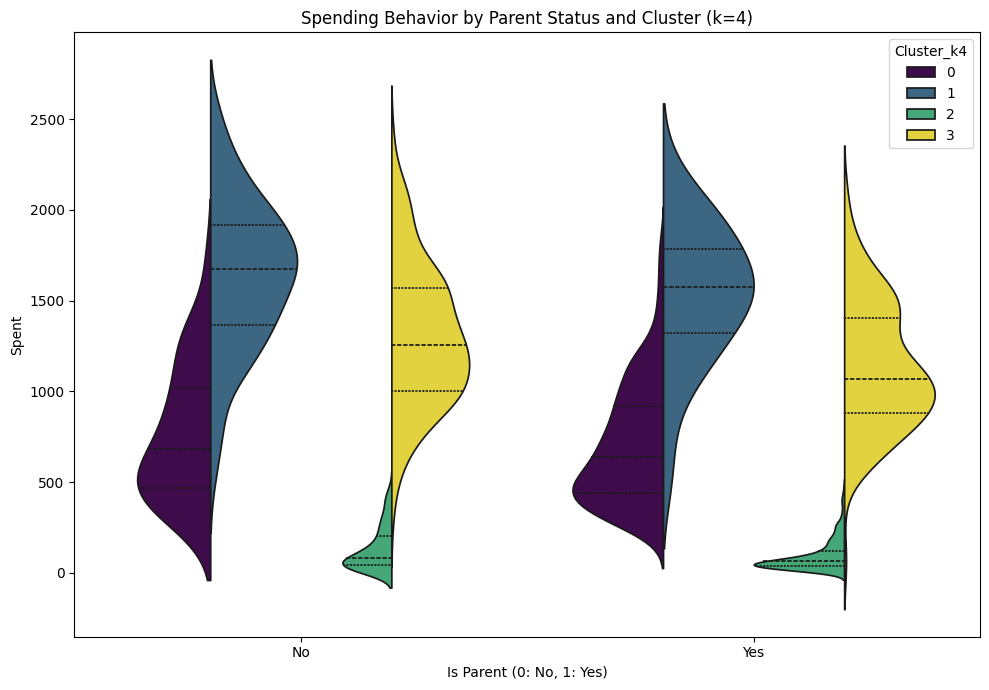

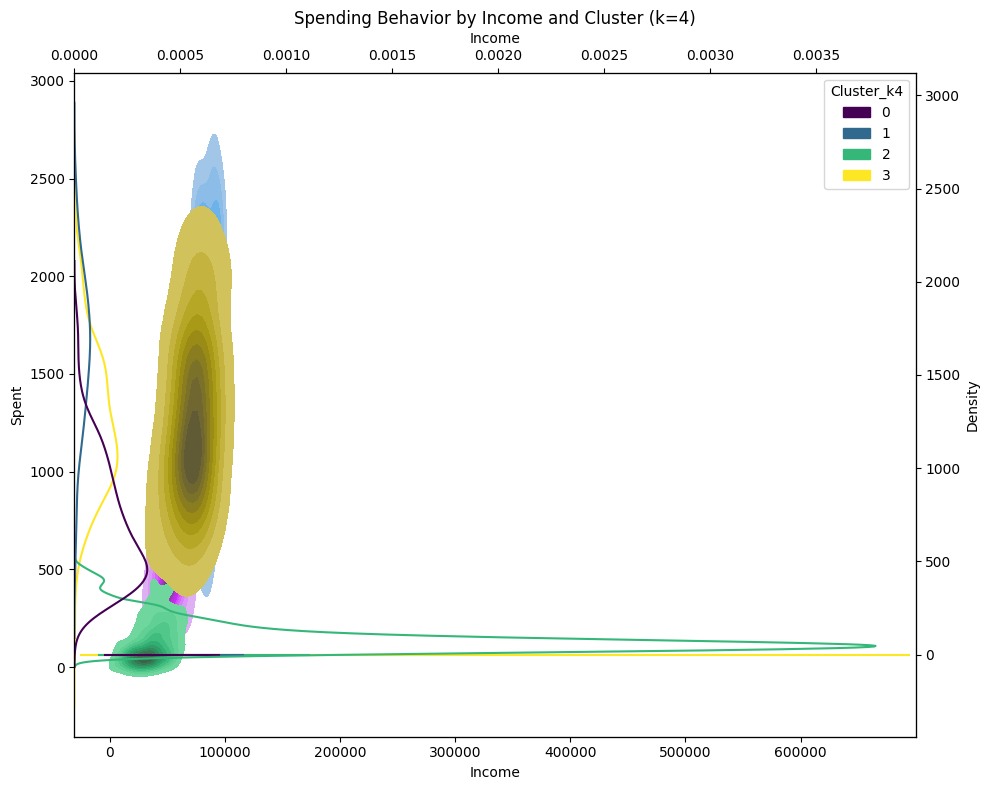

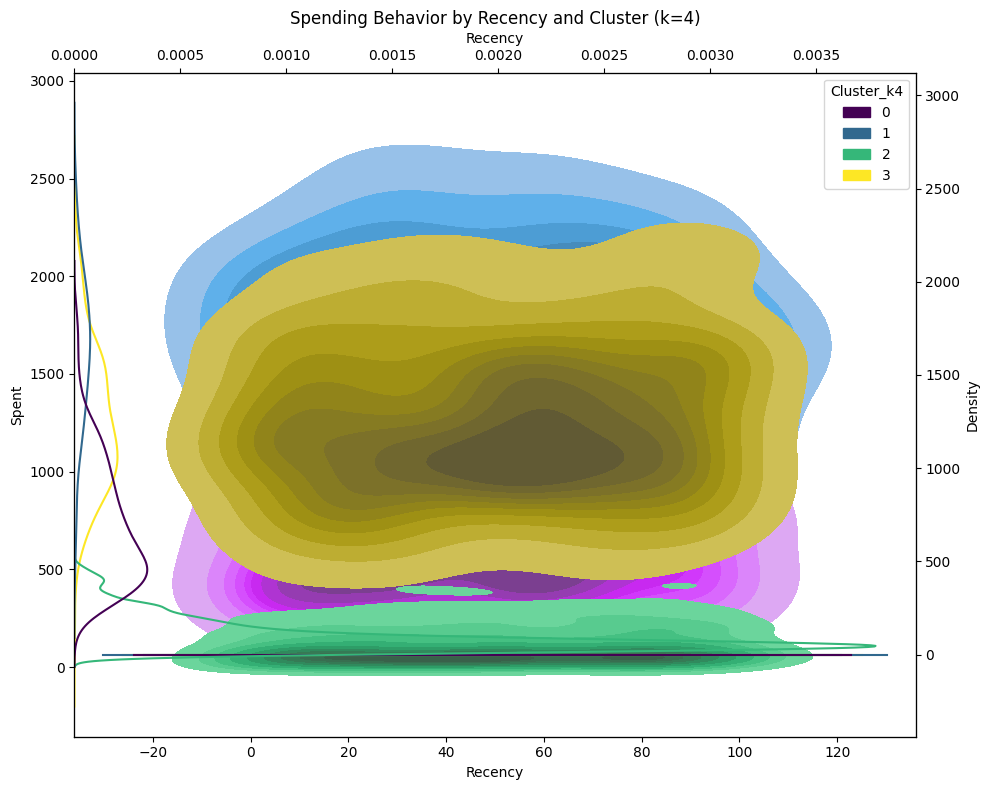

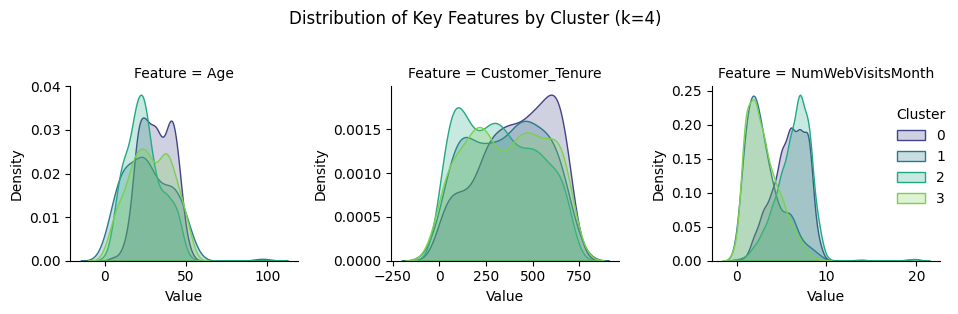

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure TotalSpending and Age are calculated if they were dropped or not present
if 'Spent' not in df.columns:
    df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

if 'Age' not in df.columns:
    latest_year = df['Year_Birth'].max()
    df['Age'] = latest_year - df['Year_Birth']

# 1. Age vs Spent
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='Age', y='Spent', hue='Cluster_k4', fill=True, palette='viridis', common_norm=False)
sns.kdeplot(data=df, x='Age', hue='Cluster_k4', palette='viridis', ax=plt.gca().twinx(), legend=False) # Marginal KDE for Age
sns.kdeplot(data=df, y='Spent', hue='Cluster_k4', palette='viridis', ax=plt.gca().twiny(), legend=False) # Marginal KDE for Spent
plt.title('Spending Behavior by Age and Cluster (k=4)')
plt.xlabel('Age')
plt.ylabel('Spent')
plt.tight_layout()
plt.savefig('kde_age_spent_by_cluster.png')
plt.show()

# 2. Is_Parent vs Spent
# Create Is_Parent feature if not present
if 'Is_Parent' not in df.columns:
    df['Is_Parent'] = np.where((df['Kidhome'] + df['Teenhome']) > 0, 1, 0)

plt.figure(figsize=(10, 7))
sns.violinplot(data=df, x='Is_Parent', y='Spent', hue='Cluster_k4', palette='viridis', split=True, inner='quart')
plt.title('Spending Behavior by Parent Status and Cluster (k=4)')
plt.xlabel('Is Parent (0: No, 1: Yes)')
plt.ylabel('Spent')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.savefig('violin_isparent_spent_by_cluster.png')
plt.show()

# 3. Income vs Spent
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='Income', y='Spent', hue='Cluster_k4', fill=True, palette='viridis', common_norm=False)
sns.kdeplot(data=df, x='Income', hue='Cluster_k4', palette='viridis', ax=plt.gca().twinx(), legend=False) # Marginal KDE for Income
sns.kdeplot(data=df, y='Spent', hue='Cluster_k4', palette='viridis', ax=plt.gca().twiny(), legend=False) # Marginal KDE for Spent
plt.title('Spending Behavior by Income and Cluster (k=4)')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.tight_layout()
plt.savefig('kde_income_spent_by_cluster.png')
plt.show()

# 4. Recency vs Spent
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='Recency', y='Spent', hue='Cluster_k4', fill=True, palette='viridis', common_norm=False)
sns.kdeplot(data=df, x='Recency', hue='Cluster_k4', palette='viridis', ax=plt.gca().twinx(), legend=False) # Marginal KDE for Recency
sns.kdeplot(data=df, y='Spent', hue='Cluster_k4', palette='viridis', ax=plt.gca().twiny(), legend=False) # Marginal KDE for Spent
plt.title('Spending Behavior by Recency and Cluster (k=4)')
plt.xlabel('Recency')
plt.ylabel('Spent')
plt.tight_layout()
plt.savefig('kde_recency_spent_by_cluster.png')
plt.show()

# 5. Optional: Grid of smaller KDE plots
# Select columns for the grid
grid_cols = ['Age', 'Customer_Tenure', 'NumWebVisitsMonth']

# Melt the DataFrame for FacetGrid
df_melted = df.melt(id_vars=['Cluster_k4'], value_vars=grid_cols, var_name='Feature', value_name='Value')

g = sns.FacetGrid(df_melted, col='Feature', hue='Cluster_k4', col_wrap=3, sharex=False, sharey=False, palette='viridis')
g.map(sns.kdeplot, 'Value', fill=True)
g.add_legend(title='Cluster')
g.fig.suptitle('Distribution of Key Features by Cluster (k=4)', y=1.03)
plt.tight_layout()
plt.savefig('kde_grid_features_by_cluster.png')
plt.show()

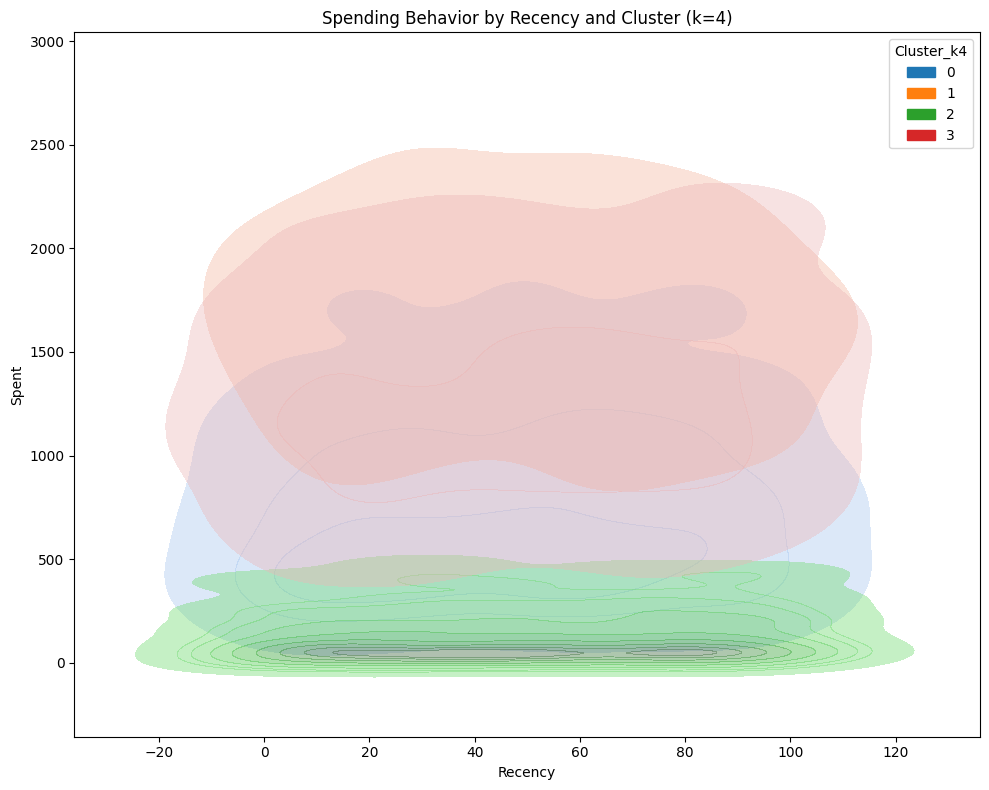

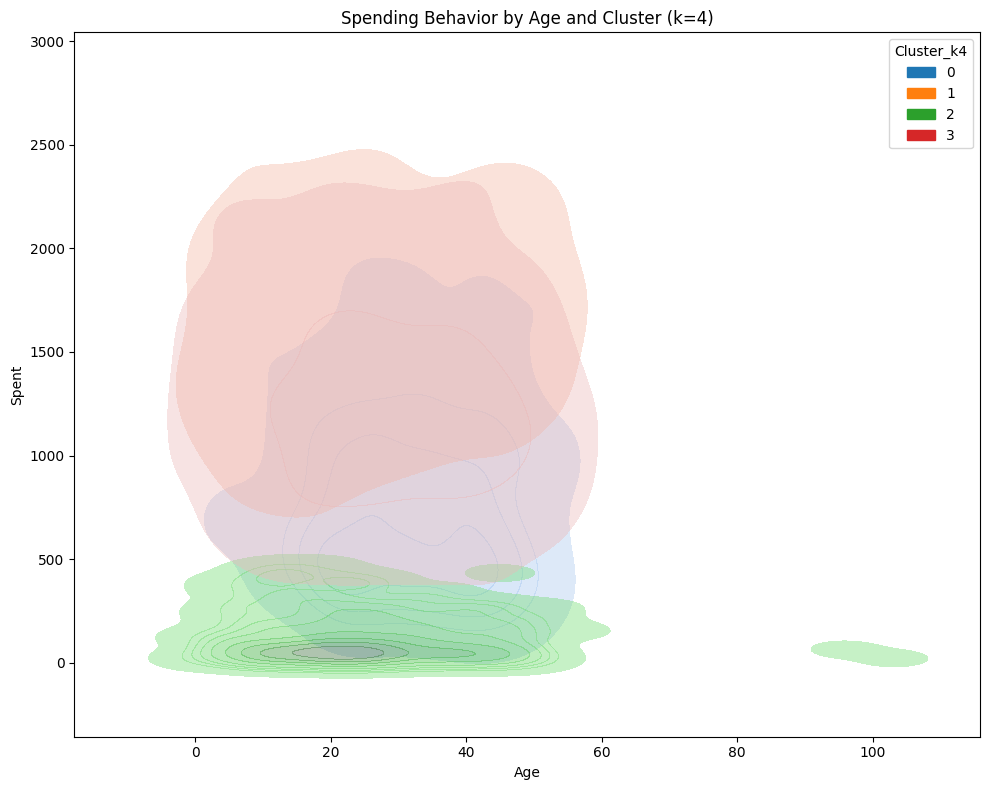

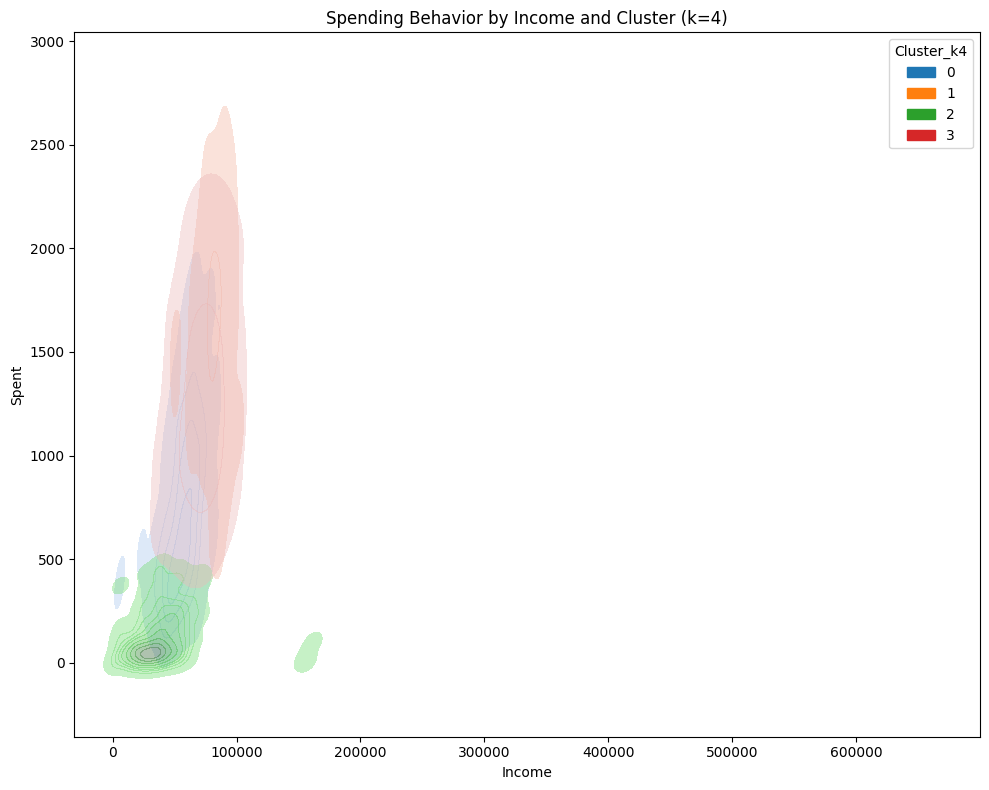

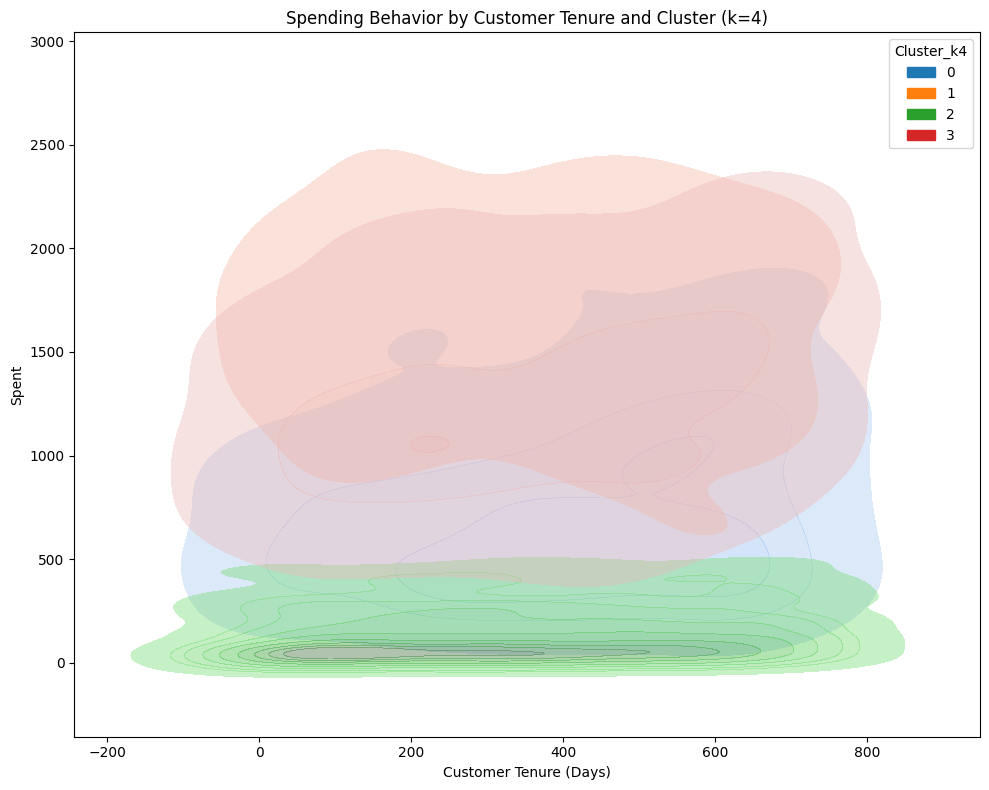

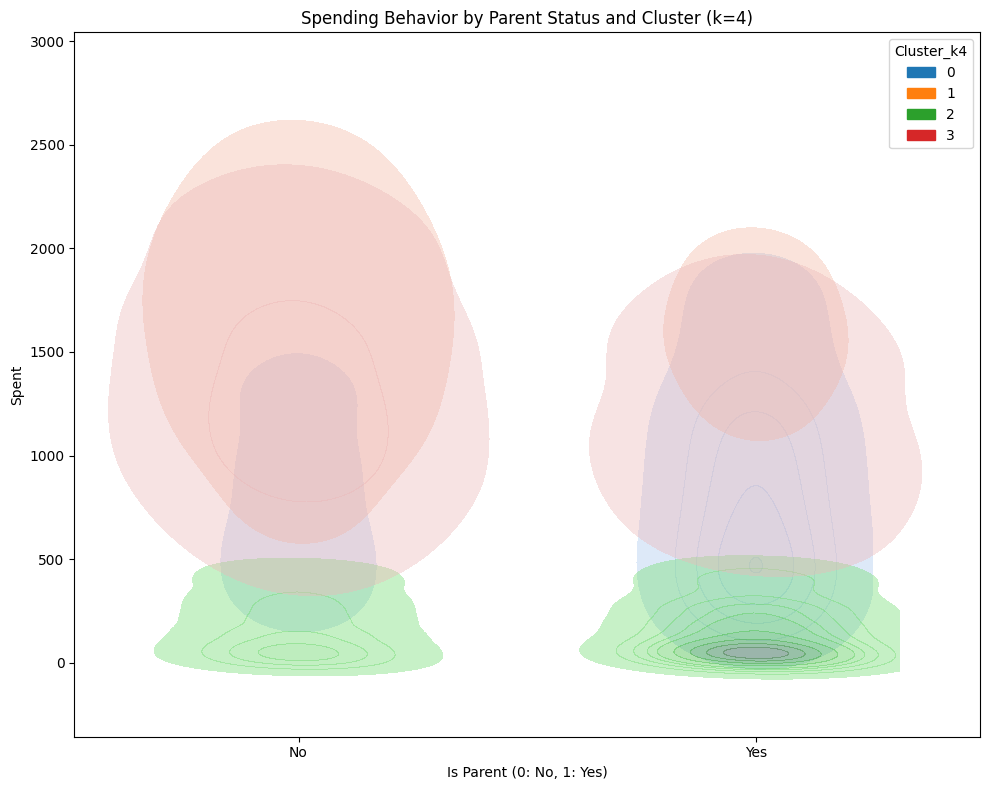

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'Spent' is calculated
if 'Spent' not in df.columns:
    df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Ensure 'Age' is calculated
if 'Age' not in df.columns:
    latest_year = df['Year_Birth'].max()
    df['Age'] = latest_year - df['Year_Birth']

# Ensure 'Is_Parent' is created
if 'Is_Parent' not in df.columns:
    df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

# Ensure 'Customer_Tenure' is calculated (if it was somehow lost)
# Based on notebook state, Customer_Tenure exists, but adding check for robustness
if 'Customer_Tenure' not in df.columns:
     # Assuming Dt_Customer is available to recalculate
     # If not, need to reload or inform user
     if 'Dt_Customer' in df.columns:
         latest_date = df['Dt_Customer'].max()
         today = latest_date + pd.Timedelta(days=1)
         df['Customer_Tenure'] = (today - df['Dt_Customer']).dt.days
     else:
         print("Warning: 'Customer_Tenure' and 'Dt_Customer' not found. Cannot regenerate Customer_Tenure.")


# 1. Recency vs Spent by cluster_k4
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x="Recency", y="Spent", hue="Cluster_k4", fill=True, alpha=0.4, thresh=0.01, palette="tab10")
plt.title('Spending Behavior by Recency and Cluster (k=4)')
plt.xlabel('Recency')
plt.ylabel('Spent')
plt.tight_layout()
plt.savefig('kde_recency_spent_by_cluster.png')
plt.show()

# 2. Age vs Spent by cluster_k4
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x="Age", y="Spent", hue="Cluster_k4", fill=True, alpha=0.4, thresh=0.01, palette="tab10")
plt.title('Spending Behavior by Age and Cluster (k=4)')
plt.xlabel('Age')
plt.ylabel('Spent')
plt.tight_layout()
plt.savefig('kde_age_spent_by_cluster.png')
plt.show()

# 3. Income vs Spent by cluster_k4
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x="Income", y="Spent", hue="Cluster_k4", fill=True, alpha=0.4, thresh=0.01, palette="tab10")
plt.title('Spending Behavior by Income and Cluster (k=4)')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.tight_layout()
plt.savefig('kde_income_spent_by_cluster.png')
plt.show()

# 4. Customer_Tenure vs Spent by cluster_k4
# Check if Customer_Tenure exists before plotting
if 'Customer_Tenure' in df.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=df, x="Customer_Tenure", y="Spent", hue="Cluster_k4", fill=True, alpha=0.4, thresh=0.01, palette="tab10")
    plt.title('Spending Behavior by Customer Tenure and Cluster (k=4)')
    plt.xlabel('Customer Tenure (Days)')
    plt.ylabel('Spent')
    plt.tight_layout()
    plt.savefig('kde_customer_tenure_spent_by_cluster.png')
    plt.show()
else:
    print("Skipping Customer_Tenure vs Spent plot as Customer_Tenure is not available.")


# 5. Is_Parent vs Spent by cluster_k4 (Using KDE contour for clarity with binary x-axis)
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x="Is_Parent", y="Spent", hue="Cluster_k4", fill=True, alpha=0.4, thresh=0.01, palette="tab10")
plt.title('Spending Behavior by Parent Status and Cluster (k=4)')
plt.xlabel('Is Parent (0: No, 1: Yes)')
plt.ylabel('Spent')
plt.xticks([0, 1], ['No', 'Yes']) # Set explicit ticks for binary variable
plt.tight_layout()
plt.savefig('kde_isparent_spent_by_cluster.png')
plt.show()

# Final summary recommendation

### Recommendations for Customer Segments (k=4):

**Cluster 0: Moderate-Income Families with Teens, Store & Web Shoppers**

*   **Characteristics:** Moderate income and spending, higher number of teens, preference for web and store purchases, moderate recency.
*   **Insights from Modeling:** Recency, Income, and Total Spending are key drivers of response.
*   **Recommendations:**
    *   **Targeted Campaigns:** Focus on family-oriented products or promotions relevant to teenagers.
    *   **Channel Optimization:** Continue engaging them through web and in-store promotions.
    *   **Recency-Based Offers:** Implement strategies to reduce recency, such as targeted discounts for customers who haven't purchased recently.
    *   **Income-Appropriate Pricing:** Offer value-for-money deals and products that align with their moderate income level.

**Cluster 1: Affluent High-Spenders, Catalog & Store Shoppers**

*   **Characteristics:** High income and very high spending (especially on wine and meat), few children, preference for catalog and store purchases, low recency.
*   **Insights from Modeling:** High Income, low Recency, and high Total Spending strongly predict positive response.
*   **Recommendations:**
    *   **Premium Product Focus:** Promote high-margin and luxury products, especially wines and meats.
    *   **Exclusive Offers:** Provide exclusive deals and early access to new products or sales.
    *   **Maintain Low Recency:** Continue personalized communication and reminders to encourage frequent purchases.
    *   **Catalog and In-Store Experience:** Enhance the catalog and in-store shopping experience, as these are their preferred channels.

**Cluster 2: Lower-Income Families, Deal Seekers**

*   **Characteristics:** Lower income, very low total spending, higher number of kids and teens, higher engagement with web visits and deals. High recency.
*   **Insights from Modeling:** Low Income, high Recency, and low Total Spending are associated with lower response. Presence of kids negatively impacts response.
*   **Recommendations:**
    *   **Value-Driven Marketing:** Emphasize discounts, deals, and budget-friendly options.
    *   **Web and Deals Channel:** Focus marketing efforts on web channels and highlight ongoing promotions and deals.
    *   **Address Recency:** Implement strategies to re-engage dormant customers in this segment, perhaps with special introductory offers.
    *   **Family-Focused Value:** Offer promotions on essential family items.

**Cluster 3: High-Income Diverse Spenders**

*   **Characteristics:** High income and high spending across various categories (wine, fruits, meat, gold), few children, preference for catalog and store purchases, low recency.
*   **Insights from Modeling:** High Income, low Recency, and high Total Spending strongly predict positive response.
*   **Recommendations:**
    *   **Cross-Category Promotion:** Promote a diverse range of products based on their varied spending patterns.
    *   **Loyalty Programs:** Implement loyalty programs that reward spending across multiple categories.
    *   **Personalized Recommendations:** Use their purchase history to provide personalized product recommendations across different categories.
    *   **Maintain Engagement:** Continue to engage them through their preferred channels (catalog and store) with relevant offers.

In [ ]:
!zip -r png_files.zip $(find /content -type f -name '*.png')

  adding: content/scatterplot_income_totalspending.png (deflated 9%)
  adding: content/shap_dependence_plot_Recency.png (deflated 3%)
  adding: content/shap_bar_plot.png (deflated 20%)
  adding: content/boxplot_numwebvisitsmonth.png (deflated 19%)
  adding: content/histograms_numeric.png (deflated 17%)
  adding: content/confusion_matrix.png (deflated 14%)
  adding: content/kde_income_spent_by_cluster.png (deflated 14%)
  adding: content/customer_segments_pca_k3.png (deflated 2%)
  adding: content/silhouette_scores.png (deflated 13%)
  adding: content/pca_explained_variance.png (deflated 12%)
  adding: content/roc_curve.png (deflated 13%)
  adding: content/kde_age_spent_by_cluster.png (deflated 9%)
  adding: content/customer_segments_pca_k4.png (deflated 2%)
  adding: content/kde_isparent_spent_by_cluster.png (deflated 8%)
  adding: content/boxplots_numeric.png (deflated 24%)
  adding: content/scatterplot_yearbirth_totalspending.png (deflated 5%)
  adding: content/cluster_pairplot_k4.pn

In [ ]:
from google.colab import files
files.download('png_files.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>